<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

--- 
# Contents


---

### Contents:
- [Part1](#Part1)
    - Problem statement
    - Background
        - Data
- [Part2](#Part2)
    - Data Import and cleaning
        - train data, univariate
    - Exploratory-Data-Analysis
    - Feature Engineering
- [Part3](#Part3)
    - Data dictionary
- [Part4](#Part4)
    - Train/Test Split
    - Linear Regression Model
    - Ridge model
        - Brute force
    - LA model 
- [Part5](#Part5)
    - Applying Lasso model to test.csv
    - Conclusions and Recommendations

--- 
# Part 1

Problem Statement and Introduction

---

## Problem Statement

Property valuators does not know the true market value of their homes. This results in a unfair payment of property tax based on valuation of property as different valuators would valuate a property different.

In this project, we would be making three supervised machine learning models; Linear Regression model, Ridge Regression model and Lasso regression model, using train data to test the model against the test data to predict the property sale price. Success of the model is determined by the Root Mean squared error (RMSE), which is the standard deviation of the residuals (prediction errors). Lower RMSE would determine a better model.
The main objective of this model is to set a predicted valuation/price of a property in line with the market perceived value of the property, allowing valuators to set a fair price for the property and hence fair property taxes for everyone who would be paying property tax.

## Background

Property prices have been increasing steadily throughout the years despite the pandemic.([*source*](https://www.globalpropertyguide.com/North-America/United-States/Price-History)). Inflation and a positive returns on investment in property,
([*source*](https://leaddeveloper.com/why-property-values-increase/)), could be a major cause of this. ([*source*](https://www.bbc.com/news/business-57090421))

As there is no accurate model to predict price of a property, problems such as cause property taxation problems ([*source*](https://www.nytimes.com/2021/04/03/opinion/sunday/property-taxes-housing-assessment-inequality.html)) and real estate agents inflating of prices of properties to consumers ([*source*](https://www.unbiased.co.uk/news/mortgages/how-to-spot-estate-agents-tricks)) do arrise. This poorly reflect the real estate industry as a whole. 

It is also said that property prises are inflated at this point and very well may be another bubble that might brought economical losses to many people. ([*source*](https://fortune.com/2022/05/31/is-housing-market-bubble-which-markets-overvalued-home-prices/))

### Data

* [`test.csv`](./datasets/test.csv): This data contain the test data for the lasso model in the projecct to make the property sale price prediction. Sale price is excluded from this dataset.
* [`train.csv`](./datasets/train.csv): This data contain the training data for constructing the models in this project.

--- 
# Part 2

Data cleaning and Exploratory-Data-Analysis

---

In [8]:
# Import working libraries:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats
import statsmodels.api as sm

from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

## Data Import and Cleaning

In [9]:
#import all data
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

### train Data Import and Cleaning

In [10]:
#Understanding the data
#see types and columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [11]:
#checking for duplicated rows
train[train.duplicated()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


All data-type seem to be in order

In [12]:
#checking values of yearremod/add
train['Year Remod/Add'].head(2)

0    2005
1    1997
Name: Year Remod/Add, dtype: int64

In [13]:
#checking values of yearbuilt
train['Year Built'].head(2)

0    1976
1    1996
Name: Year Built, dtype: int64

In [14]:
train['Mas Vnr Type'].head(5)

0    BrkFace
1    BrkFace
2       None
3       None
4       None
Name: Mas Vnr Type, dtype: object

In [15]:
#checking values of masvnrarea
train['Mas Vnr Area'].head(5)
#note: if Mas Vnr Type value is none, Mas Vnr Area would be 0.0

0    289.0
1    132.0
2      0.0
3      0.0
4      0.0
Name: Mas Vnr Area, dtype: float64

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


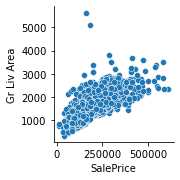

In [16]:
#removing outliers as suggested by http://jse.amstat.org/v19n3/decock/DataDocumentation.txt under special notes
sns.pairplot (train, y_vars= ['Gr Liv Area'], x_vars = ['SalePrice']);
train[train['Gr Liv Area']>3999]

there is 2 outliners in train dataset above.

In [17]:
train1 = train[train['Gr Liv Area']<4000]
train1

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


2 outliners removed

In [18]:
#the number of null values for every catagory
for n in train1:
    if (train1[n].isnull().sum()) >1:
        print (f'{n}, {train1[n].isnull().sum()}')

Lot Frontage, 330
Alley, 1909
Mas Vnr Type, 22
Mas Vnr Area, 22
Bsmt Qual, 55
Bsmt Cond, 55
Bsmt Exposure, 58
BsmtFin Type 1, 55
BsmtFin Type 2, 56
Bsmt Full Bath, 2
Bsmt Half Bath, 2
Fireplace Qu, 1000
Garage Type, 113
Garage Yr Blt, 114
Garage Finish, 114
Garage Qual, 114
Garage Cond, 114
Pool QC, 2041
Fence, 1649
Misc Feature, 1985


Pool QC have got 2041/2049 null value.
Which also mean there is only 8/2049 property have a pool.
Too little data to make a model to predict price of property with a pool.

In [19]:
train2 = train1.drop(columns=['Pool QC','Pool Area'])

Lot Frontage null data should be replaced to 0 instead of blank

In [20]:
train3 = train2

In [21]:
#Lot Frontage null data should be replaced to 0 instead of blank
train3['Lot Frontage'] = train3['Lot Frontage'].fillna(0)

In [22]:
train4 = train3

In [23]:
#dropping rows with null values for Mas Vnr Type and Mas Vnr Area as null is blank and there is only 22 of it

train4.dropna(subset = ['Mas Vnr Area', 'Mas Vnr Type'], inplace=True)

Bsmt Qual, Bsmt Cond, Bsmt Exposure is for the basement features.  
NA = no basement is regarded as null  
Some blank values in Bsmt Cond which cause the null value to defer from cond and qual

In [24]:
train5 = train4

In [25]:
train5['Bsmt Qual'].fillna('None', inplace=True)
train5['Bsmt Cond'].fillna('None', inplace=True)
train5['BsmtFin Type 1'].fillna('None', inplace=True)
train5['BsmtFin Type 2'].fillna('None', inplace=True)
train5['Bsmt Exposure'].fillna('None', inplace=True)
train5['Alley'].fillna('None', inplace=True)
train5['Fireplace Qu'].fillna('None', inplace=True)

In [26]:
train6 = train5

In [27]:
train6.dropna(subset = ['Bsmt Full Bath', 'Bsmt Half Bath'], inplace=True)

In [28]:
train7 = train6
train7['Fireplace Qu'].fillna('None', inplace=True)
train7['Garage Yr Blt'].fillna('None', inplace=True)
train7['Garage Finish'].fillna('None', inplace=True)
train7['Garage Qual'].fillna('None', inplace=True)
train7['Garage Cond'].fillna('None', inplace=True)
train7['Fence'].fillna('None', inplace=True)
train7['Misc Feature'].fillna('None', inplace=True)
train7.dropna(subset = ['Garage Area', 'Garage Cars'], inplace=True)

In [29]:
train7.to_csv('../datasets/train7.csv')

In [30]:
train8 = train7
#train8 to train12 - numerizing catagorial features, some numerized values would be used and some would not be used for the model later

In [31]:
train7['MS Zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [32]:
train8['MS Zoning']= train8['MS Zoning'].map({'A (agr)':1, 'C (all)': 2,'FV':3,'I (all)':4,'RH':5,'RL':6, 'RP':7,'RM':8})

In [33]:
train8['MS Zoning'].isnull().sum()

0

In [34]:
train8['MS Zoning'].unique()
#MS zoning does not have any RP, (Residential Low Density Park) values

array([6, 8, 3, 2, 1, 5, 4], dtype=int64)

In [35]:
train8['Street'].isnull().sum()

0

In [36]:
train8['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [37]:
train8['Street']= train8['Street'].map({'Pave':1, 'Grvl':2})

In [38]:
train8['Street'].unique()

array([1, 2], dtype=int64)

In [39]:
train8['Land Contour'].unique()

array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object)

In [40]:
train8['Utilities'].unique()

array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object)

In [41]:
train8['Land Contour']= train8['Land Contour'].map({'Lvl':1, 'HLS':3, 'Bnk':2, 'Low':4})

In [42]:
train8['Utilities']=train8['Utilities'].map({'AllPub':1, 'NoSeWa':3, 'NoSewr':2, 'ELO':4})

In [43]:
train9 = train8

In [44]:
train9['Lot Config'].unique()

array(['CulDSac', 'Inside', 'Corner', 'FR2', 'FR3'], dtype=object)

In [45]:
train9['Lot Config']= train9['Lot Config'].map({'Inside':1, 'Corner':2, 'CulDSac':3, 'FR2':4, 'FR3':5})

In [46]:
train9['Land Slope']= train9['Land Slope'].map({'Gtl':1, 'Mod':2, 'Sev':3})

In [47]:
train9['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'Gilbert',
       'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV', 'NridgHt',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [48]:
train9['Neighborhood'] = train9['Neighborhood'].map({
       'Blmngtn':1,
       'Blueste':2,
       'BrDale'	:3,
       'BrkSide':4,
       'ClearCr':5,
       'CollgCr':6,
       'Crawfor':7,
       'Edwards':8,
       'Gilbert':9,
       'Greens':10,
       'GrnHill':11,
       'IDOTRR':12,
       'Landmrk':13,
       'MeadowV':14,
       'Mitchel':15,
       'NAmes':16,
       'NoRidge':17,
       'NPkVill':18,
       'NridgHt':19,
       'NWAmes':20,
       'OldTown':21,
       'SWISU':22,
       'Sawyer':23,
       'SawyerW':24,
       'Somerst':25,
       'StoneBr':26,
       'Timber':27,
       'Veenker':28})

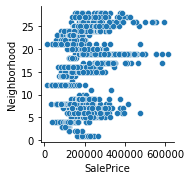

In [49]:
sns.pairplot(train9, y_vars= ['Neighborhood'], x_vars = ['SalePrice']);

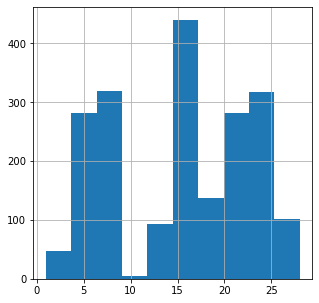

In [50]:
train9['Neighborhood'].hist(figsize=(5,5));

In [51]:
train9['Neighborhood'].value_counts()
#model based on neighbourhood would likely to perform badly in area 2, 10, 11, 13 due to too little data
#model based on neighbourhood would likely to perform better for area 16 due to higher armount of data

16    310
6     179
21    163
8     139
25    120
19    120
23    111
9     111
20     87
24     86
15     82
4      75
7      70
12     68
17     48
27     47
26     38
22     32
5      27
14     24
1      22
3      19
28     17
18     17
2       6
10      3
11      2
13      1
Name: Neighborhood, dtype: int64

In [52]:
train10 = train9

In [53]:
assignindex = dict(enumerate(train10['Condition 1'].sort_values(ascending = True).unique(),1))
assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'Condition 1': assignindex})

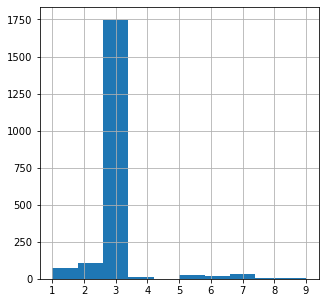

In [54]:
train10['Condition 1'].hist(figsize=(5,5));

In [55]:
assignindex = dict(enumerate(train10['Condition 2'].sort_values(ascending = True).unique(),1))
assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'Condition 2': assignindex})

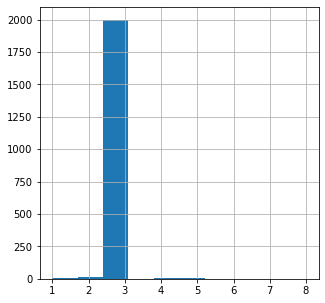

In [56]:
train10['Condition 2'].hist(figsize=(5,5));

In [57]:
assignindex = dict(enumerate(train10['Bldg Type'].sort_values(ascending = True).unique(),1))
assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'Bldg Type': assignindex})

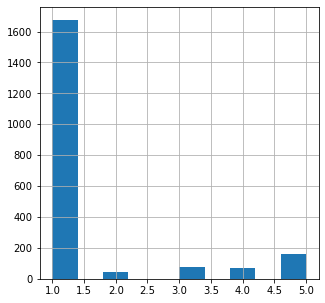

In [58]:
train10['Bldg Type'].hist(figsize=(5,5));

In [59]:
assignindex = {1: '1Story',
 2: '1.5Fin',
 3: '1.5Unf',
 4: '2Story',
 5: '2.5Fin',
 6: '2.5Unf',
 7: 'SFoyer',
 8: 'SLvl'}
assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'House Style': assignindex})

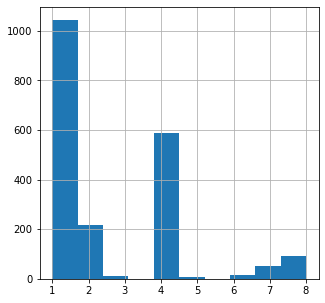

In [60]:
train10['House Style'].hist(figsize=(5,5));

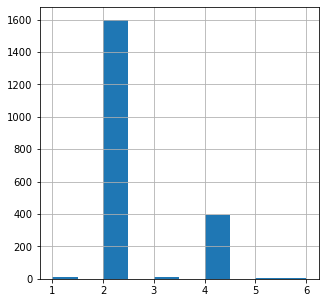

In [61]:
assignindex = dict(enumerate(train10['Roof Style'].sort_values(ascending = True).unique(),1))
assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'Roof Style': assignindex})

train10['Roof Style'].hist(figsize=(5,5));

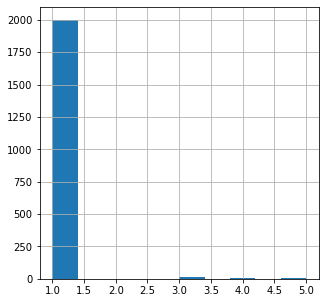

In [62]:
assignindex = dict(enumerate(train10['Roof Matl'].sort_values(ascending = True).unique(),1))
assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'Roof Matl': assignindex})

train10['Roof Matl'].hist(figsize=(5,5));

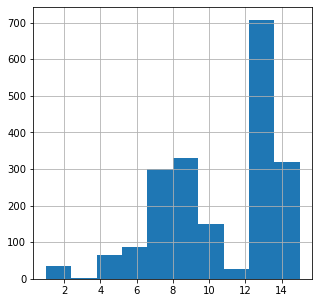

In [63]:
assignindex = dict(enumerate(train10['Exterior 1st'].sort_values(ascending = True).unique(),1))
assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'Exterior 1st': assignindex})
train10['Exterior 1st'].hist(figsize=(5,5));

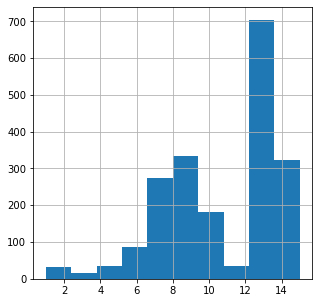

In [64]:
assignindex = dict(enumerate(train10['Exterior 2nd'].sort_values(ascending = True).unique(),1))
assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'Exterior 2nd': assignindex})
train10['Exterior 2nd'].hist(figsize=(5,5));

In [65]:
print(train9['Exterior 2nd'].sort_values(ascending = True).unique())
print(train9['Exterior 1st'].sort_values(ascending = True).unique())

['AsbShng' 'AsphShn' 'Brk Cmn' 'BrkFace' 'CBlock' 'CmentBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Plywood' 'Stone' 'Stucco' 'VinylSd' 'Wd Sdng'
 'Wd Shng']
['AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 'CBlock' 'CemntBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Plywood' 'Stone' 'Stucco' 'VinylSd' 'Wd Sdng'
 'WdShing']


Both columns Exterior 1st and 2nd does not have any values for 'Others'

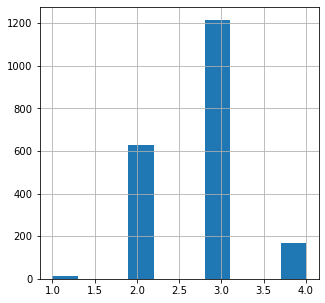

In [66]:
assignindex = dict(enumerate(train10['Mas Vnr Type'].sort_values(ascending = True).unique(),1))
assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'Mas Vnr Type': assignindex})
train10['Mas Vnr Type'].hist(figsize=(5,5));

In [67]:
(train9['Mas Vnr Type'].sort_values(ascending = True).unique())

array(['BrkCmn', 'BrkFace', 'None', 'Stone'], dtype=object)

There is no values for CBlock, cinder block for Mas Vnr Type

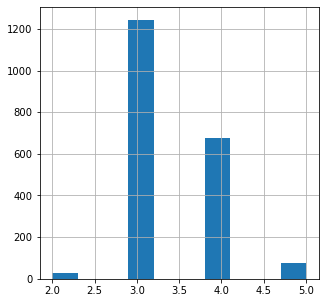

In [68]:
assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po'}
assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'Exter Qual': assignindex})
train10['Exter Qual'].hist(figsize=(5,5));

In [69]:
train9['Exter Qual'].sort_values(ascending = False).unique()

array(['TA', 'Gd', 'Fa', 'Ex'], dtype=object)

There is no poor evaluation, Po for Exter qual

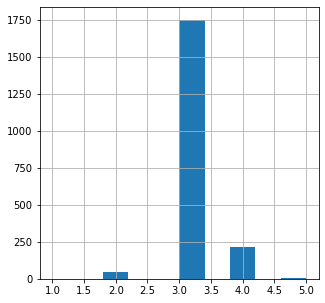

In [70]:
assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po'}
assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'Exter Cond': assignindex})
train10['Exter Cond'].hist(figsize=(5,5));

In [71]:
train9['Exter Cond'].value_counts().sort_values(ascending = False).unique()

array([1751,  215,   49,    7,    2], dtype=int64)

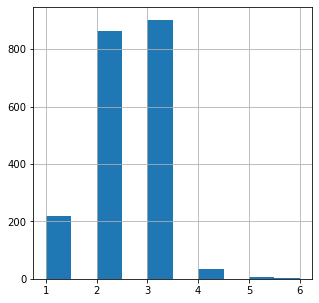

In [72]:
assignindex = dict(enumerate(train10['Foundation'].sort_values(ascending = True).unique(),1))
assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'Foundation': assignindex})
train10['Foundation'].hist(figsize=(5,5));

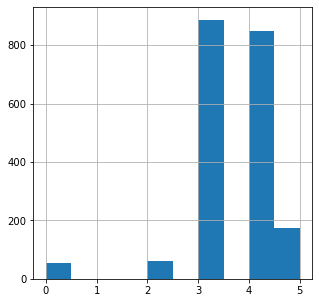

In [73]:
assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po',
 0: 'None'}

assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'Bsmt Qual': assignindex})
train10['Bsmt Qual'].hist(figsize=(5,5));

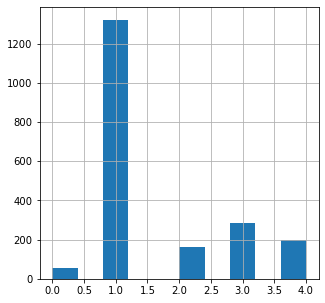

In [74]:
assignindex = {4: 'Gd',
 3: 'Av',
 2: 'Mn',
 1: 'No',
 0: 'None',}

assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'Bsmt Exposure': assignindex})
train10['Bsmt Exposure'].hist(figsize=(5,5));

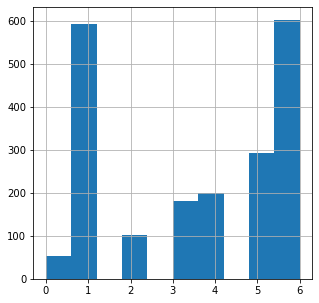

In [75]:
assignindex = {6: 'GLQ',
 5: 'ALQ',
 4: 'BLQ',
 3: 'Rec',
 2: 'LwQ',
 1: 'Unf',
 0: 'None',}

assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'BsmtFin Type 1': assignindex})
train10['BsmtFin Type 1'].hist(figsize=(5,5));

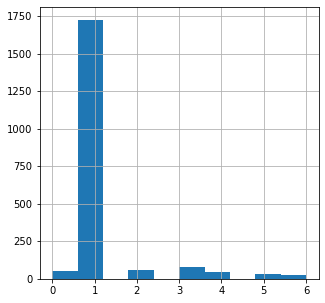

In [76]:
assignindex = {6: 'GLQ',
 5: 'ALQ',
 4: 'BLQ',
 3: 'Rec',
 2: 'LwQ',
 1: 'Unf',
 0: 'None',}

assignindex = {v: k for k, v in assignindex.items()}
train10 = train10.replace({'BsmtFin Type 2': assignindex})
train10['BsmtFin Type 2'].hist(figsize=(5,5));

In [77]:
train11 = train10

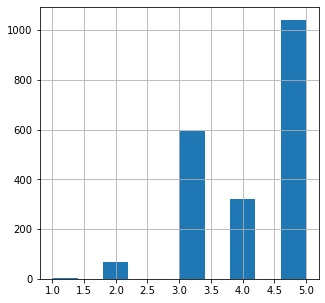

In [78]:
assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po'}
assignindex = {v: k for k, v in assignindex.items()}
train11 = train11.replace({'Heating QC': assignindex})
train11['Heating QC'].hist(figsize=(5,5));

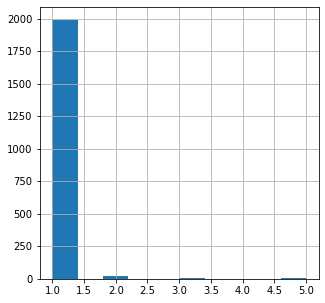

In [79]:
assignindex = dict(enumerate(train11['Heating'].sort_values(ascending = True).unique(),1))
assignindex = {v: k for k, v in assignindex.items()}
train11 = train11.replace({'Heating': assignindex})
train11['Heating'].hist(figsize=(5,5));

In [80]:
train10['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW'], dtype=object)

In [81]:
train11['Central Air'] = train11['Central Air'].map({'Y':1, 'N': 0})

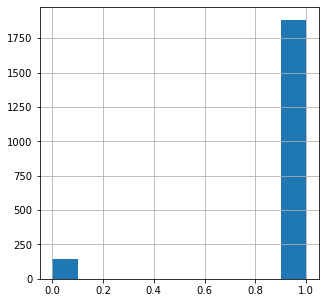

In [82]:
train11['Central Air'].hist(figsize=(5,5));

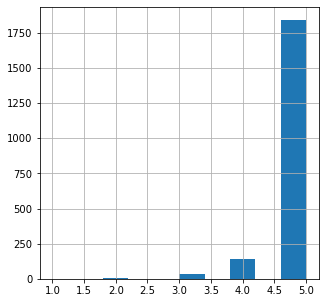

In [83]:
assignindex = {5: 'SBrkr',
 4: 'FuseA',
 3: 'FuseF',
 2: 'FuseP',
 1: 'Mix'}
assignindex = {v: k for k, v in assignindex.items()}
train11 = train11.replace({'Electrical': assignindex})
train11['Electrical'].hist(figsize=(5,5));

In [84]:
train10['Electrical'].value_counts()

SBrkr    1842
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

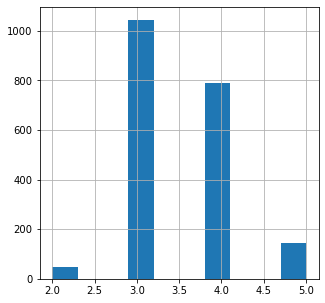

In [85]:
assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po'}
assignindex = {v: k for k, v in assignindex.items()}
train11 = train11.replace({'Kitchen Qual': assignindex})
train11['Kitchen Qual'].hist(figsize=(5,5));

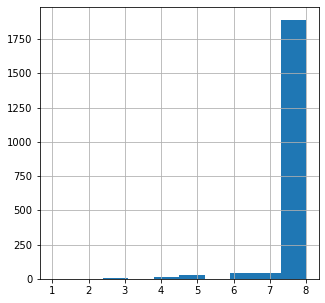

In [86]:
assignindex = {8: 'Typ',
 7: 'Min1',
 6: 'Min2',
 5: 'Mod',
 4: 'Maj1',
 3: 'Maj2',
 2: 'Sev',
 1: 'Sal'}
    
assignindex = {v: k for k, v in assignindex.items()}
train11 = train11.replace({'Functional': assignindex})
train11['Functional'].hist(figsize=(5,5));

In [87]:
train11['Functional'].value_counts()

8    1889
6      42
7      42
5      29
4      11
3       7
2       2
1       2
Name: Functional, dtype: int64

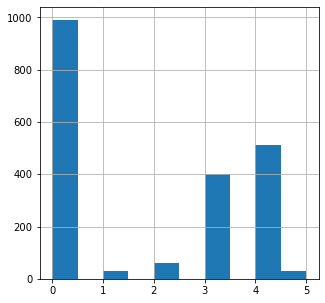

In [88]:
assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po',
 0: 'None'}
assignindex = {v: k for k, v in assignindex.items()}
train11 = train11.replace({'Fireplace Qu': assignindex})
train11['Fireplace Qu'].hist(figsize=(5,5));

In [89]:
train10['Fireplace Qu'].value_counts()

None    990
Gd      511
TA      402
Fa       59
Po       31
Ex       31
Name: Fireplace Qu, dtype: int64

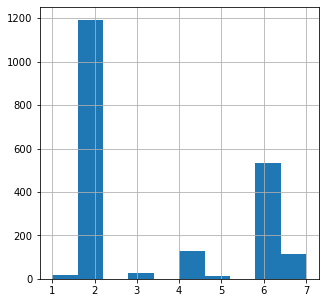

In [90]:
assignindex = dict(enumerate(train11['Garage Type'].sort_values(ascending = True).unique(),1))
assignindex = {v: k for k, v in assignindex.items()}
train11 = train11.replace({'Garage Type': assignindex})
train11['Garage Type'].hist(figsize=(5,5));

In [91]:
train11['Garage Type'].value_counts()
#np.nan = 112 = value 7.0

2.0    1192
6.0     534
4.0     129
7.0     112
3.0      27
1.0      19
5.0      11
Name: Garage Type, dtype: int64

In [92]:
train10['Garage Type'].value_counts()

Attchd     1192
Detchd      534
BuiltIn     129
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

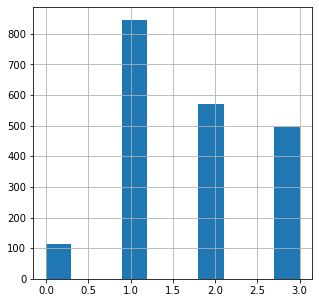

In [93]:
assignindex = {
 3: 'Fin',
 2: 'RFn',
 1: 'Unf',
 0: 'None'}
assignindex = {v: k for k, v in assignindex.items()}
train11 = train11.replace({'Garage Finish': assignindex})
train11['Garage Finish'].hist(figsize=(5,5));

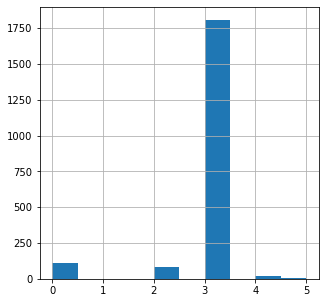

In [94]:
assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po',
 0: 'None'}
assignindex = {v: k for k, v in assignindex.items()}
train11 = train11.replace({'Garage Qual': assignindex})
train11['Garage Qual'].hist(figsize=(5,5));

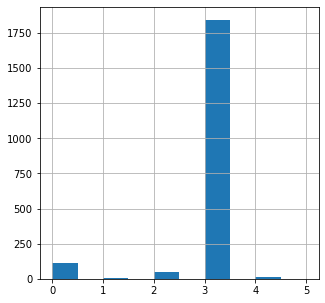

In [95]:
train11 = train11.replace({'Garage Cond': assignindex})
train11['Garage Cond'].hist(figsize=(5,5));

In [96]:
train11['Paved Drive'] = train11['Paved Drive'].map({'Y':3, 'P': 2,'N': 1})

In [97]:
train11['Paved Drive'].value_counts()

3    1835
1     150
2      39
Name: Paved Drive, dtype: int64

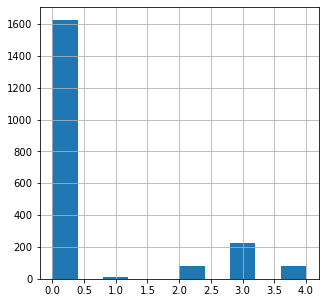

In [98]:
assignindex = {
 4: 'GdPrv',
 3: 'MnPrv',
 2: 'GdWo',
 1: 'MnWw',
 0: 'None'}
assignindex = {v: k for k, v in assignindex.items()}
train11 = train11.replace({'Fence': assignindex})
train11['Fence'].hist(figsize=(5,5));

In [99]:
train11['Fence'].value_counts()

0    1626
3     225
4      83
2      80
1      10
Name: Fence, dtype: int64

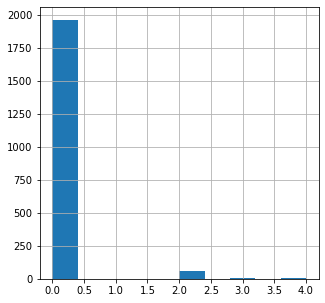

In [100]:
assignindex = {5: 'Elev',
 4: 'Gar2',
 3: 'Othr',
 2: 'Shed',
 1: 'TenC',
 0: 'None'}
assignindex = {v: k for k, v in assignindex.items()}
train11 = train11.replace({'Misc Feature': assignindex})
train11['Misc Feature'].hist(figsize=(5,5));

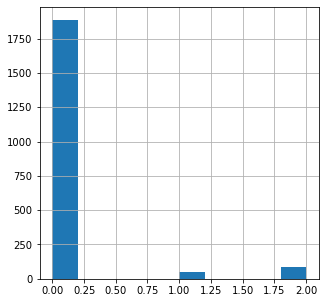

In [101]:
assignindex = {
 2: 'Grvl',
 1: 'Pave',
 0: 'None'}
assignindex = {v: k for k, v in assignindex.items()}
train11 = train11.replace({'Alley': assignindex})
train11['Alley'].hist(figsize=(5,5));

In [102]:
train11['Alley'].value_counts()

0    1886
2      85
1      53
Name: Alley, dtype: int64

In [103]:
train11['Misc Feature'].value_counts()

0    1960
2      56
4       4
3       3
1       1
Name: Misc Feature, dtype: int64

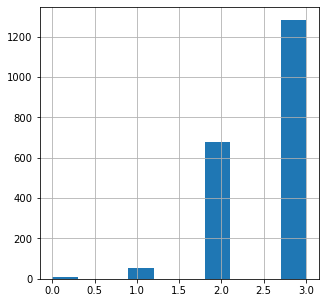

In [104]:
assignindex = { 3: 'Reg',
 2: 'IR1',
 1: 'IR2',
 0: 'IR3'}
assignindex = {v: k for k, v in assignindex.items()}
train11 = train11.replace({'Lot Shape': assignindex})
train11['Lot Shape'].hist(figsize=(5,5));

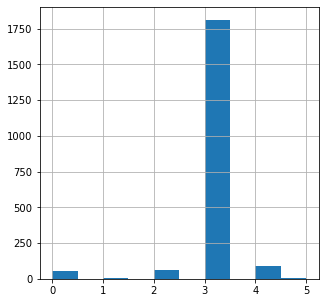

In [105]:
assignindex = { 5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po',
 0: 'None',}
assignindex = {v: k for k, v in assignindex.items()}
train11 = train11.replace({'Bsmt Cond': assignindex})
train11['Bsmt Cond'].hist(figsize=(5,5));

In [106]:
train12 = train11.drop(columns=['Id','PID'])

In [107]:
for n in train11:
    print (f'{n} {train11[n].isnull().sum()}')

Id 0
PID 0
MS SubClass 0
MS Zoning 0
Lot Frontage 0
Lot Area 0
Street 0
Alley 0
Lot Shape 0
Land Contour 0
Utilities 0
Lot Config 0
Land Slope 0
Neighborhood 0
Condition 1 0
Condition 2 0
Bldg Type 0
House Style 0
Overall Qual 0
Overall Cond 0
Year Built 0
Year Remod/Add 0
Roof Style 0
Roof Matl 0
Exterior 1st 0
Exterior 2nd 0
Mas Vnr Type 0
Mas Vnr Area 0
Exter Qual 0
Exter Cond 0
Foundation 0
Bsmt Qual 0
Bsmt Cond 0
Bsmt Exposure 0
BsmtFin Type 1 0
BsmtFin SF 1 0
BsmtFin Type 2 0
BsmtFin SF 2 0
Bsmt Unf SF 0
Total Bsmt SF 0
Heating 0
Heating QC 0
Central Air 0
Electrical 0
1st Flr SF 0
2nd Flr SF 0
Low Qual Fin SF 0
Gr Liv Area 0
Bsmt Full Bath 0
Bsmt Half Bath 0
Full Bath 0
Half Bath 0
Bedroom AbvGr 0
Kitchen AbvGr 0
Kitchen Qual 0
TotRms AbvGrd 0
Functional 0
Fireplaces 0
Fireplace Qu 0
Garage Type 0
Garage Yr Blt 0
Garage Finish 0
Garage Cars 0
Garage Area 0
Garage Qual 0
Garage Cond 0
Paved Drive 0
Wood Deck SF 0
Open Porch SF 0
Enclosed Porch 0
3Ssn Porch 0
Screen Porch 0
Fence 

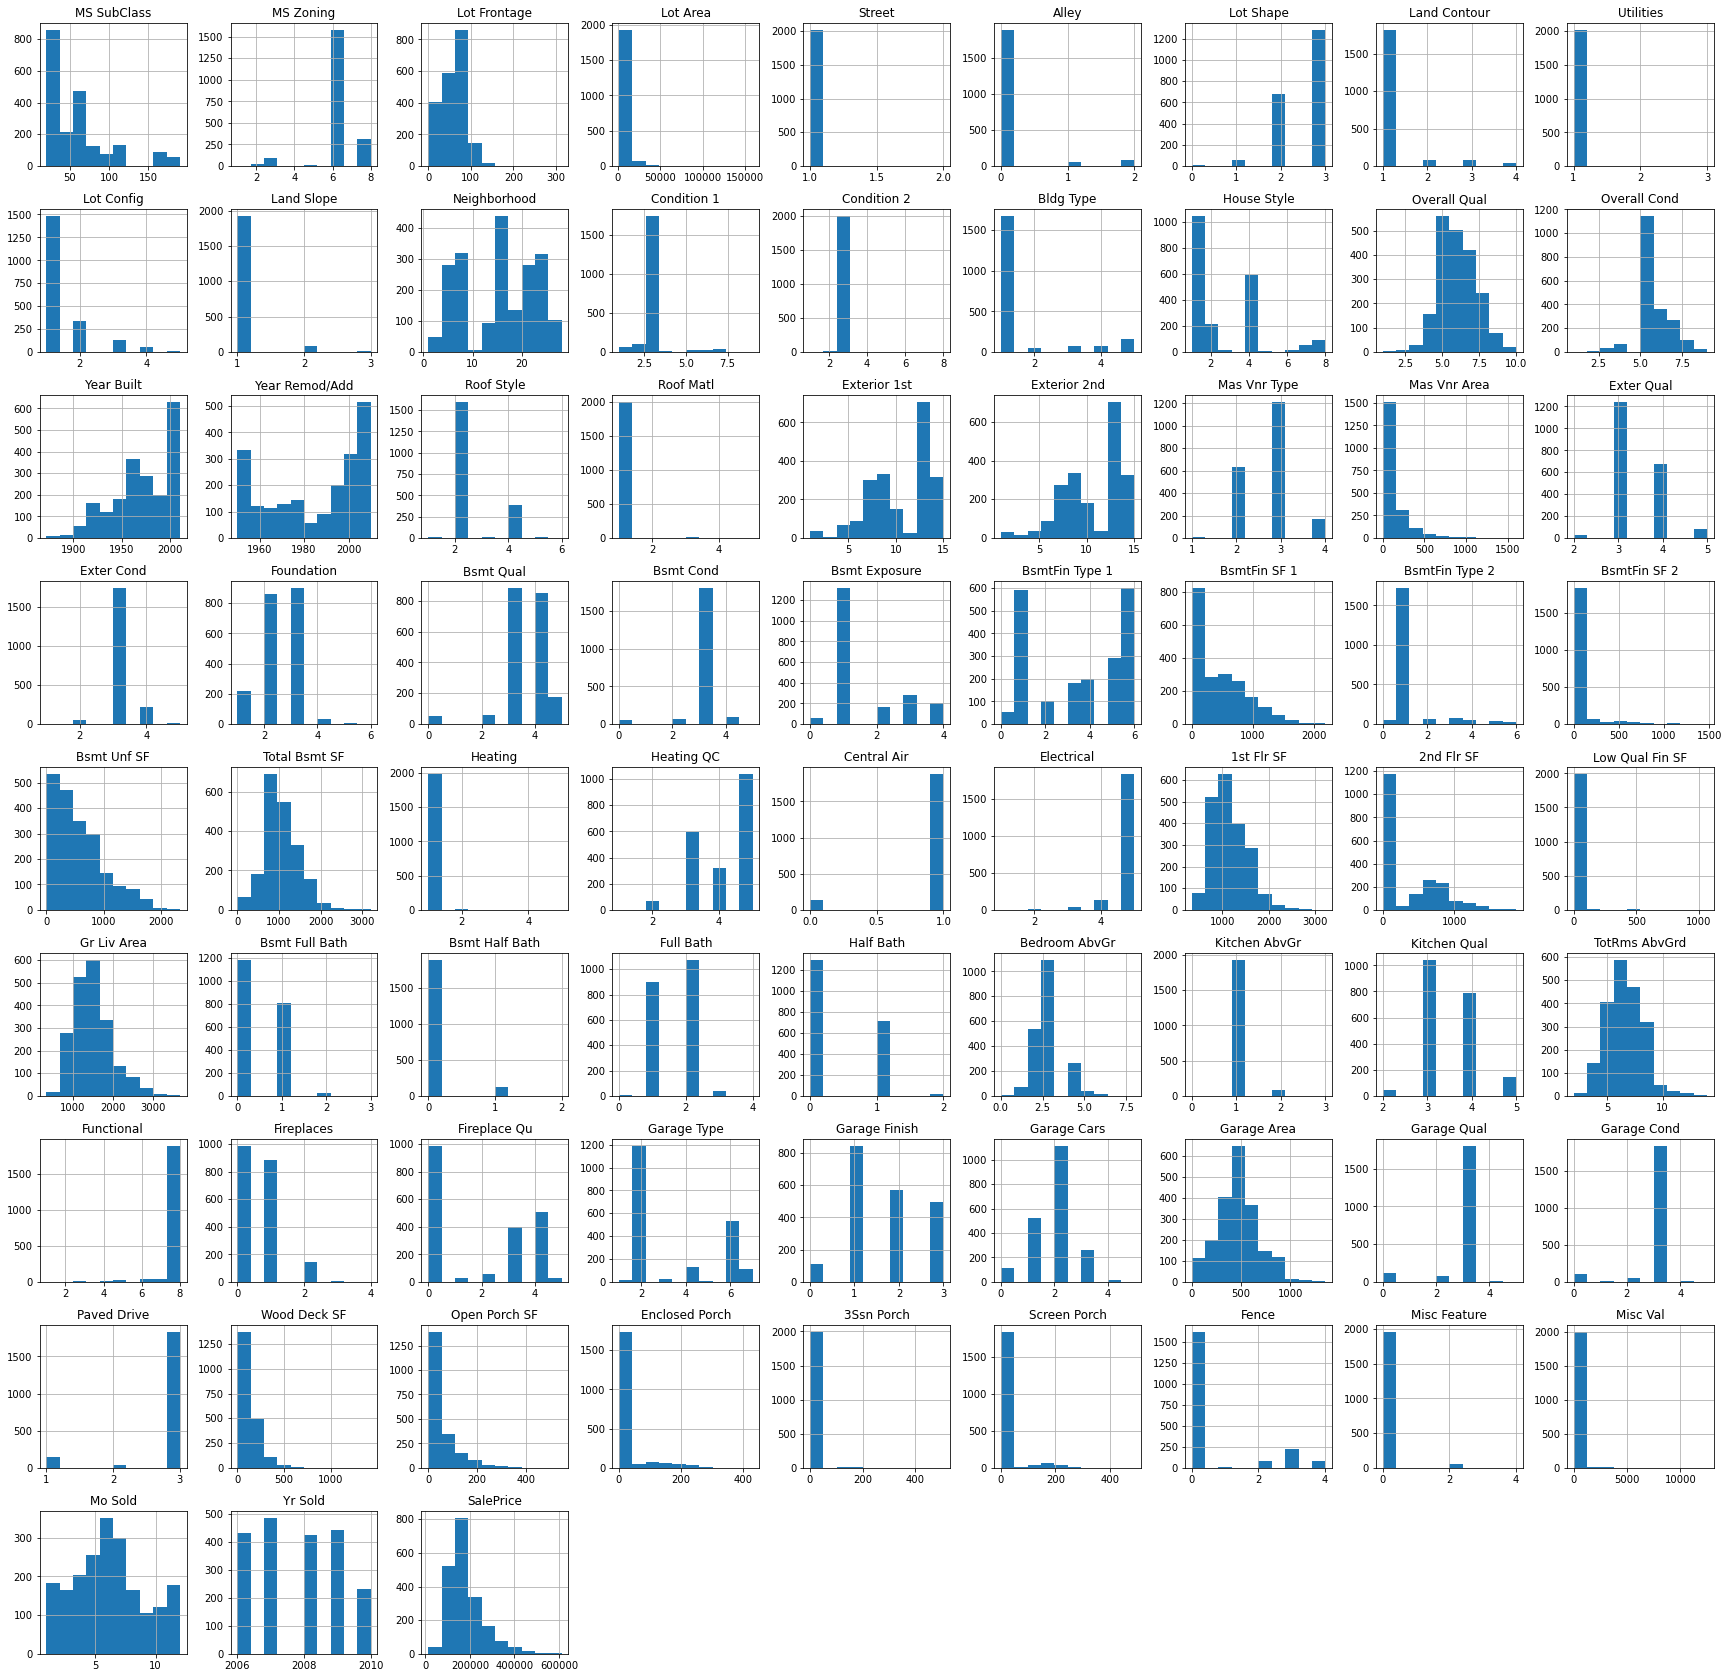

In [108]:
train12.hist(figsize=(30,30));

Most of the data in catagorial feature is skewed, meaning more data in one catagory as compared to the others. Even distributed features should be considered for the model. Evenly distributed features includes Mo Sold, Yr sold, garage area, grarage cars, garage finish, Totrms AbvGrd, 1st Flr SF, Total bsmt SF, Gr Liv Area, Overall Qual. Heavily skewed features like Misc Val for example could be considered to be used but not as ideal. There is a possibility that these features may be used to form new feature which would give higher correlation to sale price and enable the model to generate better prediction

## Exploratory-Data-Analysis

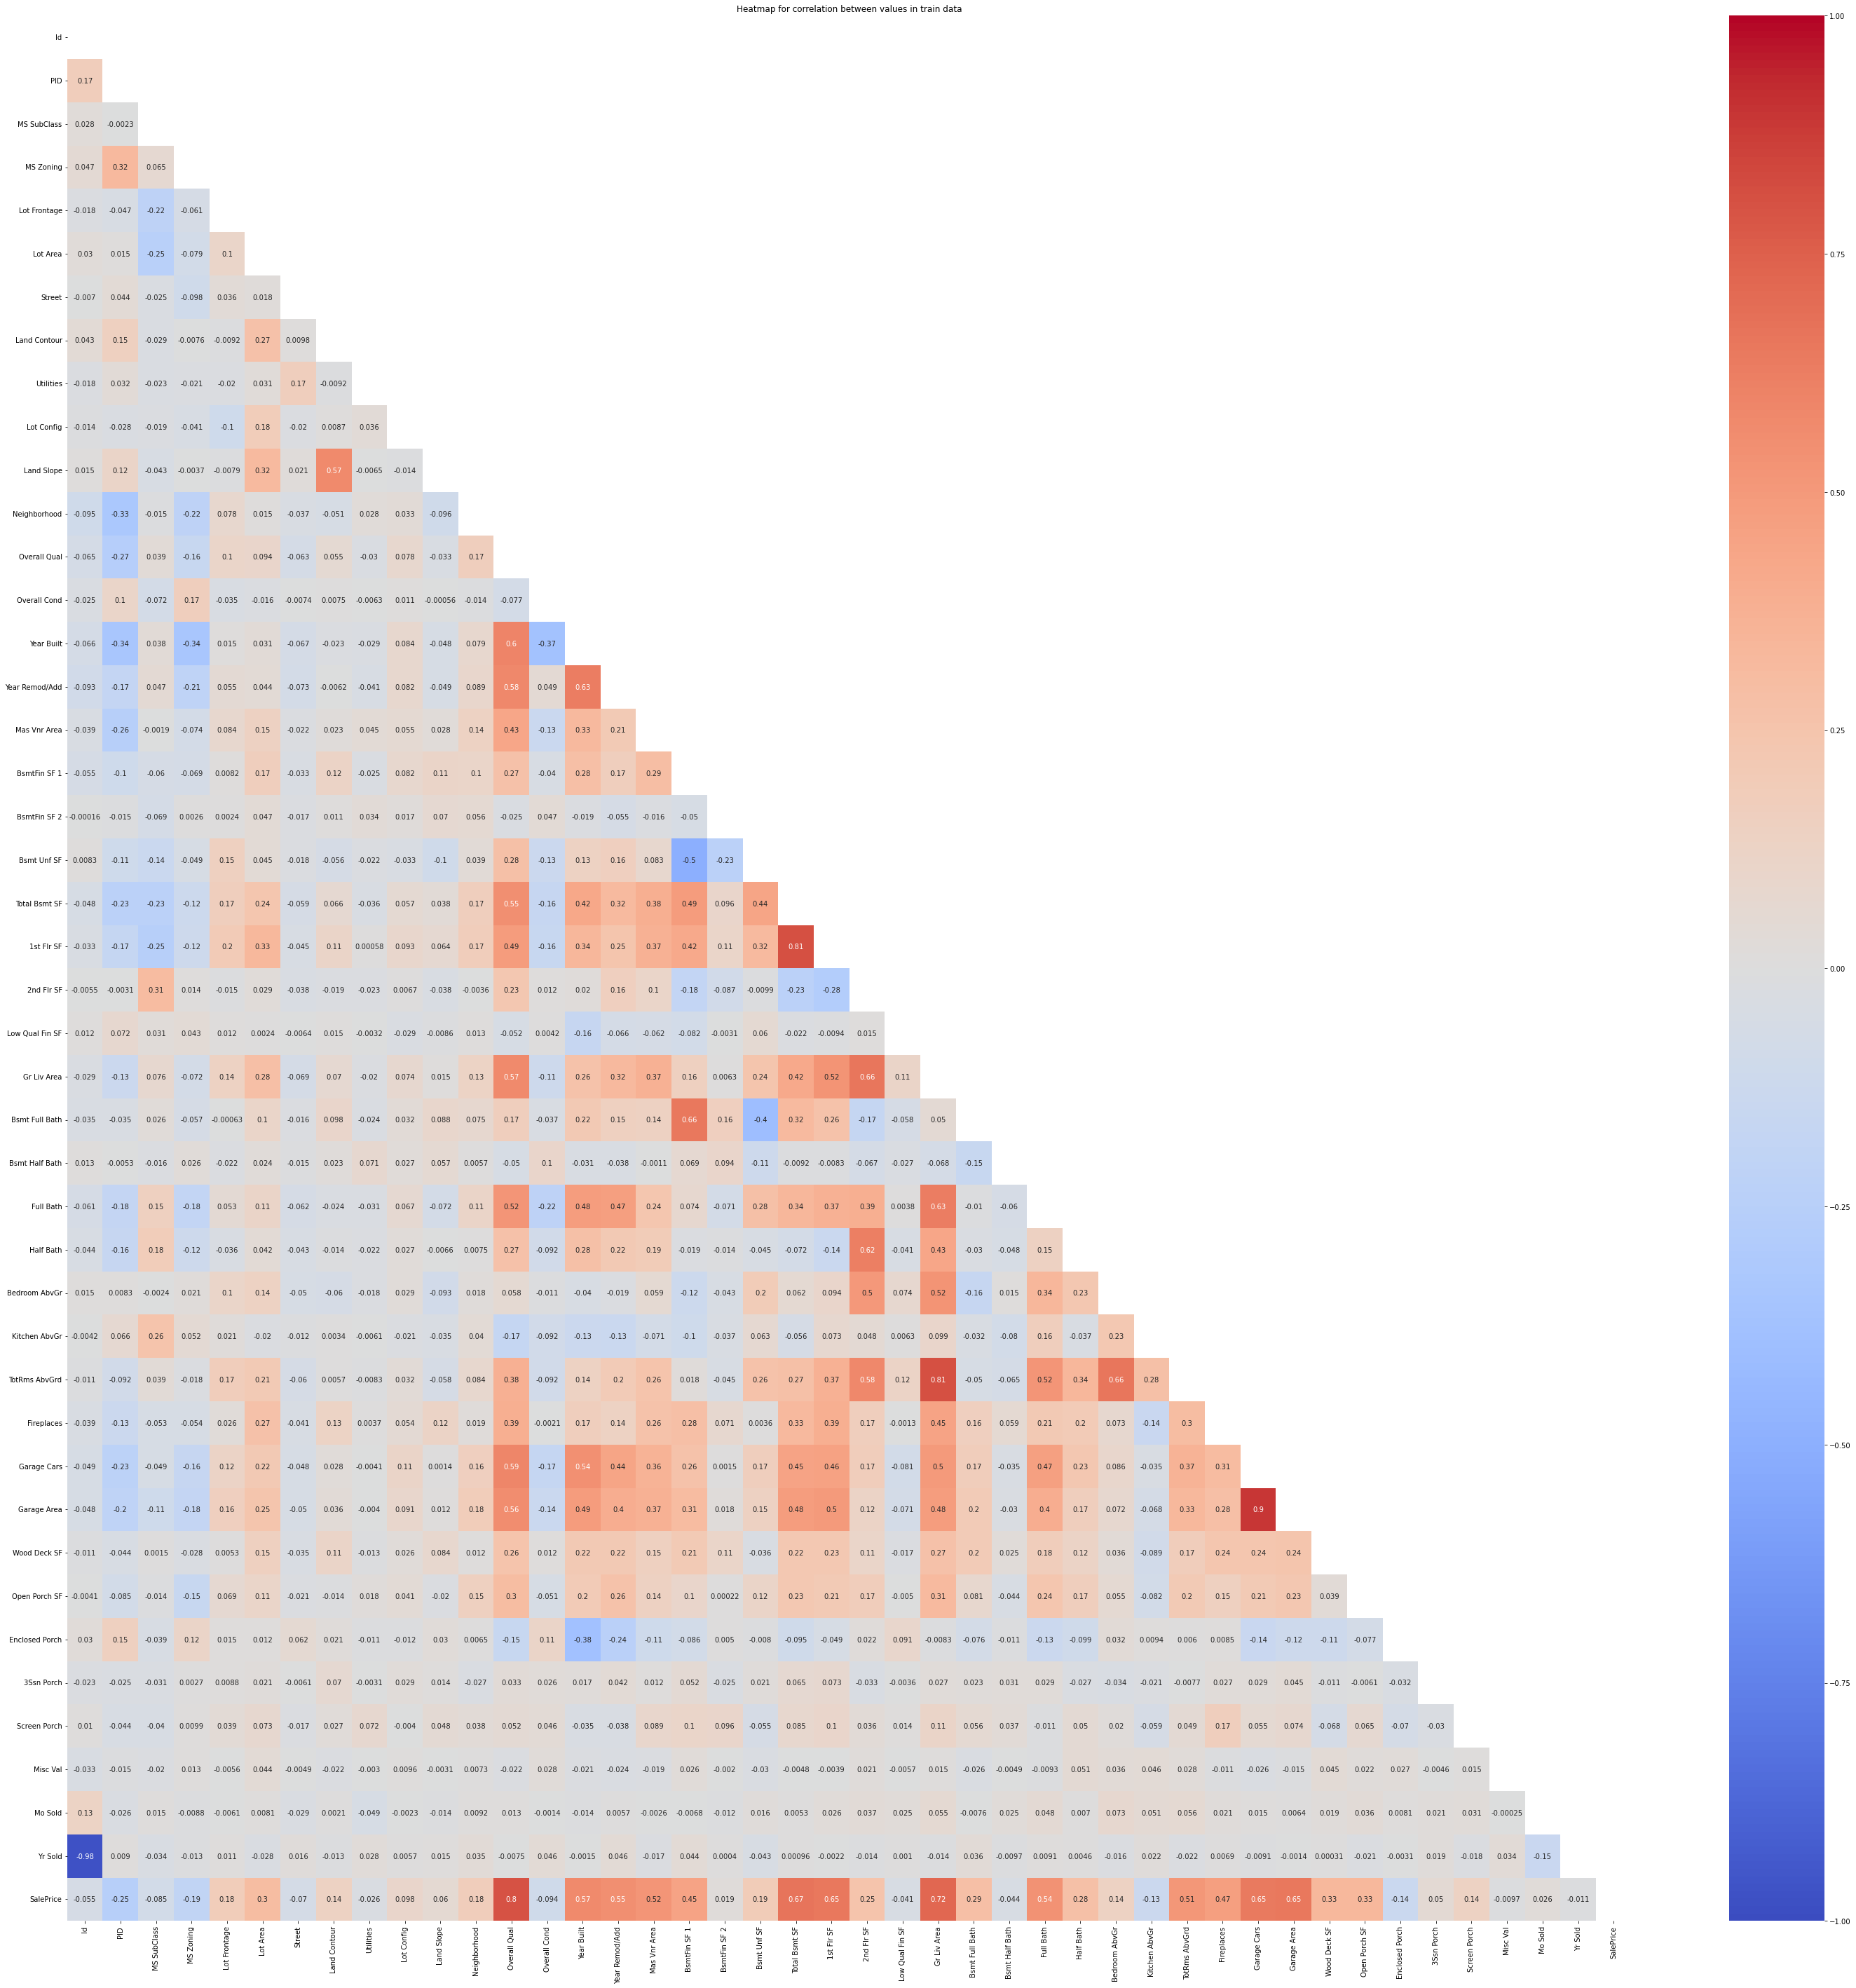

In [109]:
# heat map to find out how attribute is related with each other, just the integers
matrix = train7.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(50,50))
sns.heatmap(train7.corr(), mask = mask, annot=True, vmin = -1, vmax=1, cmap='coolwarm').set(title= 'Heatmap for correlation between values in train data');

In [110]:
print(train7.corr()['SalePrice'].sort_values())

PID               -0.252501
MS Zoning         -0.188820
Enclosed Porch    -0.138103
Kitchen AbvGr     -0.126260
Overall Cond      -0.094304
MS SubClass       -0.085332
Street            -0.069989
Id                -0.055094
Bsmt Half Bath    -0.044108
Low Qual Fin SF   -0.041166
Utilities         -0.026406
Yr Sold           -0.011014
Misc Val          -0.009688
BsmtFin SF 2       0.019355
Mo Sold            0.025971
3Ssn Porch         0.049854
Land Slope         0.060002
Lot Config         0.098356
Land Contour       0.135224
Screen Porch       0.137777
Bedroom AbvGr      0.138419
Neighborhood       0.179686
Lot Frontage       0.183445
Bsmt Unf SF        0.191294
2nd Flr SF         0.251325
Half Bath          0.278854
Bsmt Full Bath     0.285615
Lot Area           0.303137
Wood Deck SF       0.329865
Open Porch SF      0.330726
BsmtFin SF 1       0.446922
Fireplaces         0.473933
TotRms AbvGrd      0.511007
Mas Vnr Area       0.520501
Full Bath          0.538732
Year Remod/Add     0

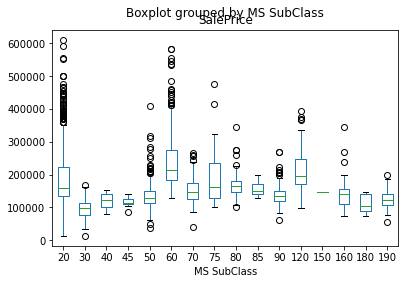

In [111]:
#get a rough gauge of the data ranges, outliers, lower and upper range for all features
#categorial features by boxplots
#some boxplots for categorial features would used the modified numeric features done in train 8-train12 to allow the chart to be read easier (Cleaner X axis)
#numerical features by scatter plots

train1.boxplot(by ='MS SubClass', column =['SalePrice'], grid = False);

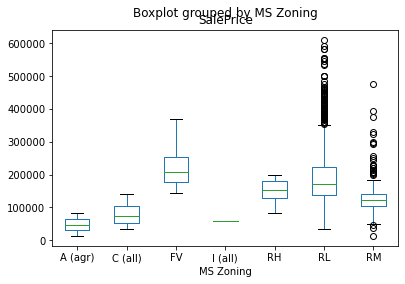

In [112]:
train1.boxplot(by ='MS Zoning', column =['SalePrice'], grid = False);

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


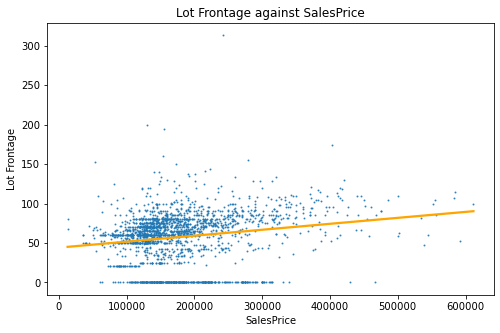

In [113]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Lot Frontage', train12, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Lot Frontage')
plt.title('Lot Frontage against SalesPrice');


In [114]:
train7['Lot Frontage'].value_counts()

0.0      324
60.0     179
70.0      96
80.0      94
50.0      89
        ... 
115.0      1
119.0      1
118.0      1
137.0      1
135.0      1
Name: Lot Frontage, Length: 118, dtype: int64

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


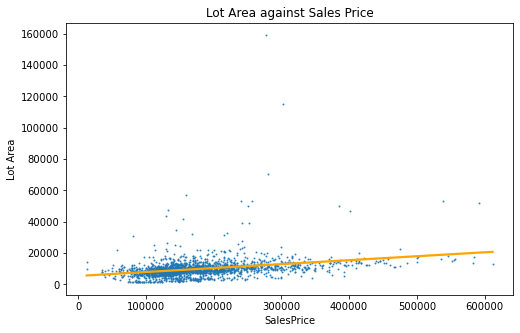

In [115]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Lot Area', train12, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Lot Area')
plt.title('Lot Area against Sales Price');


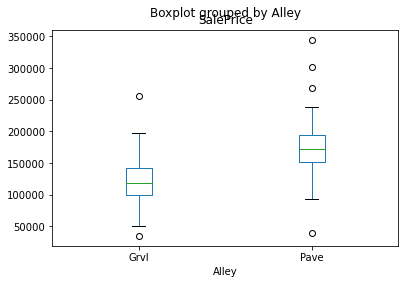

In [116]:
train1.boxplot(by ='Alley', column =['SalePrice'], grid = False);

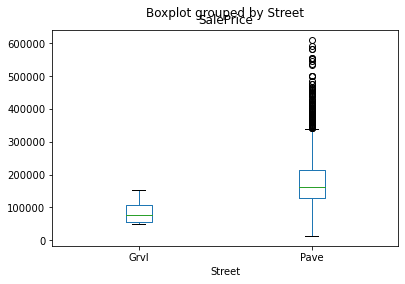

In [117]:
train1.boxplot(by ='Street', column =['SalePrice'], grid = False);

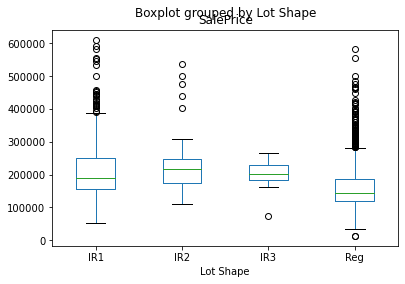

In [118]:
train1.boxplot(by ='Lot Shape', column =['SalePrice'], grid = False);

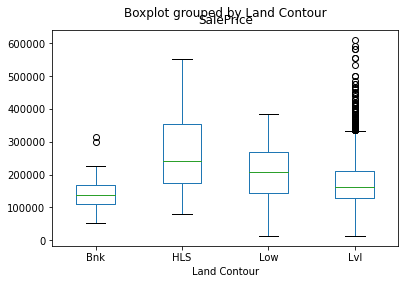

In [119]:
train1.boxplot(by ='Land Contour', column =['SalePrice'], grid = False);

In [120]:
train1['Land Contour'].value_counts()

Lvl    1843
HLS      85
Bnk      78
Low      43
Name: Land Contour, dtype: int64

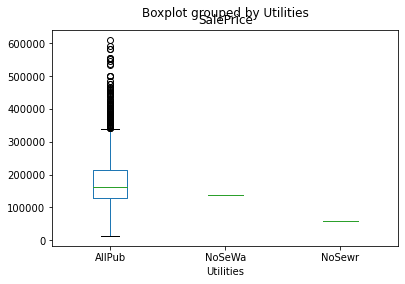

In [121]:
train1.boxplot(by ='Utilities', column =['SalePrice'], grid = False);

In [122]:
train1['Utilities'].value_counts()

AllPub    2047
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

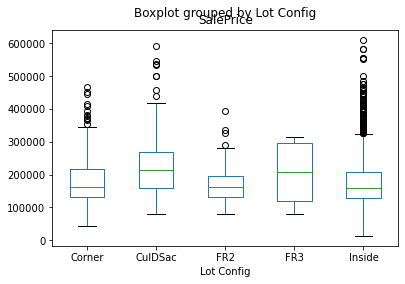

In [123]:
train1.boxplot(by ='Lot Config', column =['SalePrice'], grid = False);

In [124]:
train1['Lot Config'].value_counts()

Inside     1502
Corner      347
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

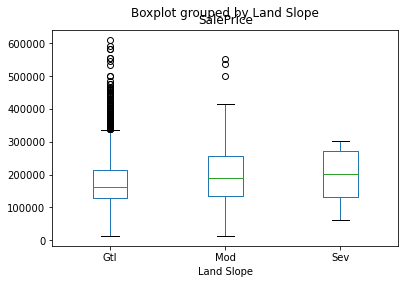

In [125]:
train1.boxplot(by ='Land Slope', column =['SalePrice'], grid = False);

In [126]:
train1['Land Slope'].value_counts()

Gtl    1951
Mod      88
Sev      10
Name: Land Slope, dtype: int64

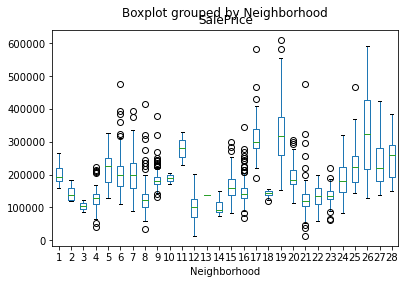

In [127]:
train11.boxplot(by ='Neighborhood', column =['SalePrice'], grid = False);
# little values for property in IDOTRR,Iowa DOT and Rail Road

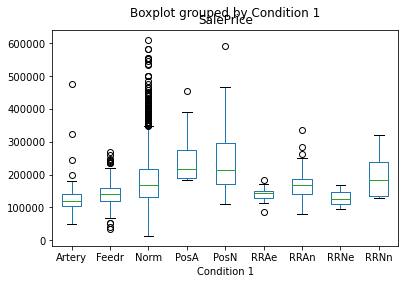

In [128]:
train1.boxplot(by ='Condition 1', column =['SalePrice'], grid = False);

In [129]:
train1['Condition 1'].value_counts()

Norm      1766
Feedr      108
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

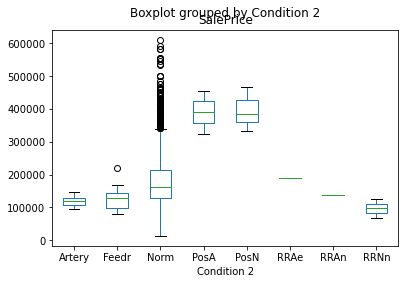

In [130]:
train1.boxplot(by ='Condition 2', column =['SalePrice'], grid = False);

In [131]:
train1['Condition 2'].value_counts()

Norm      2023
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64

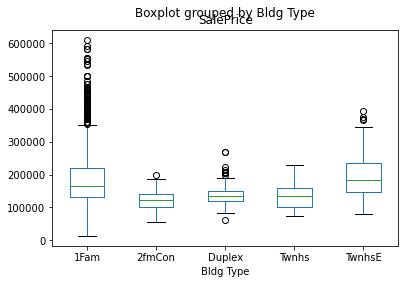

In [132]:
train1.boxplot(by ='Bldg Type', column =['SalePrice'], grid = False);

In [133]:
train1['Bldg Type'].value_counts()

1Fam      1698
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

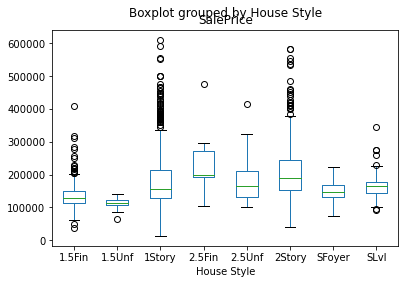

In [134]:
train1.boxplot(by ='House Style', column =['SalePrice'], grid = False);

In [135]:
train1['House Style'].value_counts()

1Story    1058
2Story     597
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

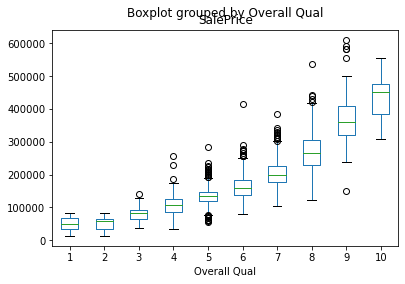

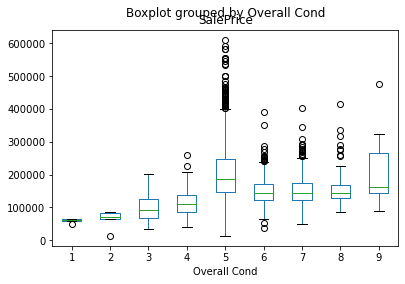

In [136]:
train1.boxplot(by ='Overall Qual', column =['SalePrice'], grid = False);
#Higher overall quality sell better
train1.boxplot(by ='Overall Cond', column =['SalePrice'], grid = False);

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


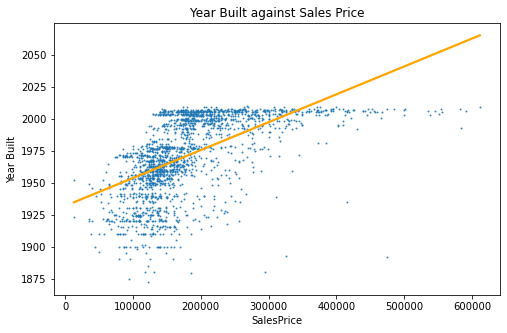

In [137]:

plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Year Built', train12, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Year Built')
plt.title('Year Built against Sales Price');


C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


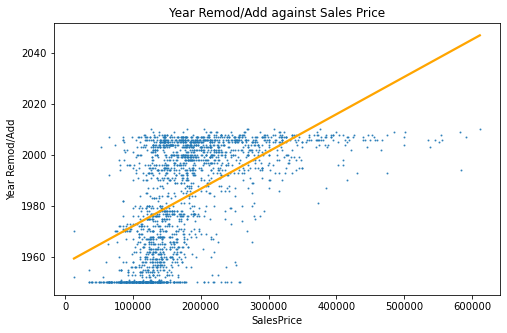

In [138]:

plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Year Remod/Add', train12, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Year Remod/Add')
plt.title('Year Remod/Add against Sales Price');


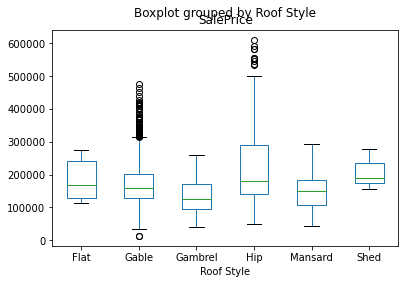

In [139]:
train1.boxplot(by ='Roof Style', column =['SalePrice'], grid = False);

In [140]:
train1['Roof Style'].value_counts()

Gable      1619
Hip         395
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

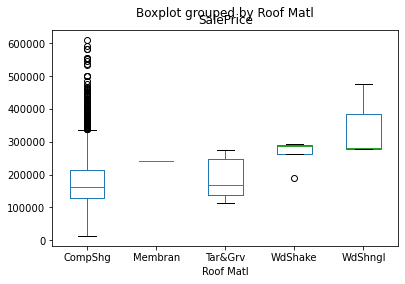

In [141]:
train1.boxplot(by ='Roof Matl', column =['SalePrice'], grid = False);
# no values for clytile, metal, roll
#commonly compshg
# Generally wld

In [142]:
train1['Roof Matl'].value_counts()

CompShg    2024
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
Name: Roof Matl, dtype: int64

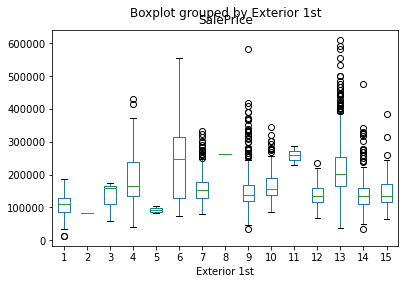

In [143]:
train12.boxplot(by ='Exterior 1st', column =['SalePrice'], grid = False);
#little data for ImStucc, Imitation Stucco

In [144]:
train1['Exterior 1st'].value_counts()

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     89
BrkFace     64
WdShing     45
AsbShng     33
Stucco      26
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64

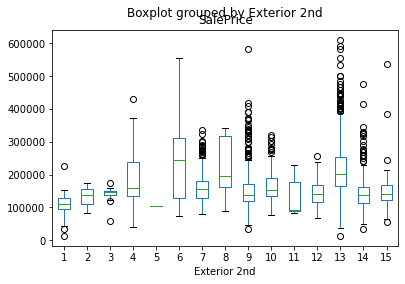

In [145]:
train12.boxplot(by ='Exterior 2nd', column =['SalePrice'], grid = False);
#little data for Cblock, Cinder Block

In [146]:
train1['Exterior 2nd'].value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     89
Wd Shng     63
BrkFace     34
Stucco      29
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

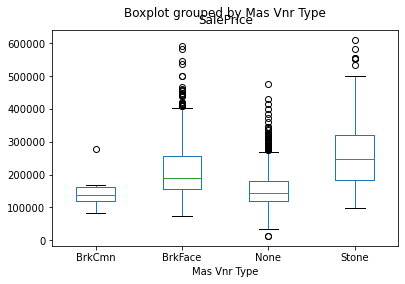

In [147]:
train1.boxplot(by ='Mas Vnr Type', column =['SalePrice'], grid = False);
#stone can sell higher generally.

In [148]:
train1['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       166
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


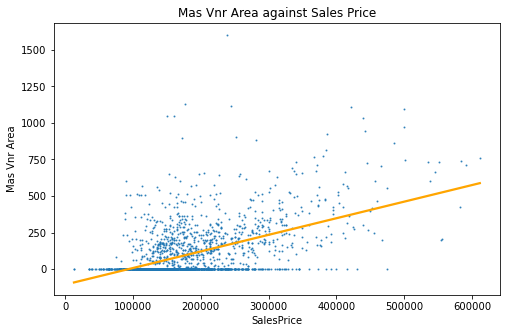

In [149]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Mas Vnr Area', train12, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Mas Vnr Area')
plt.title('Mas Vnr Area against Sales Price');

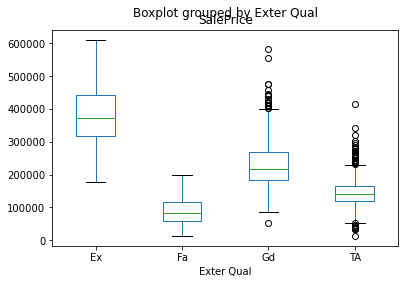

In [150]:
train1.boxplot(by ='Exter Qual', column =['SalePrice'], grid = False);
#no data for fair and poor property

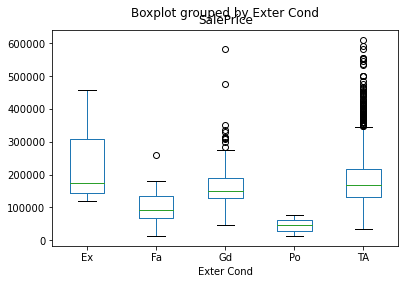

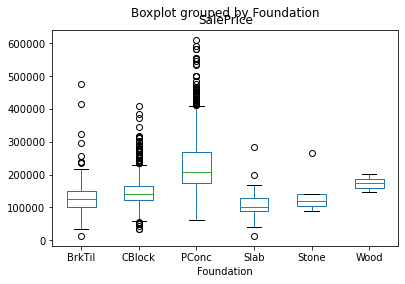

In [151]:
train1.boxplot(by ='Exter Cond', column =['SalePrice'], grid = False);
#no data for fair and poor property

train1.boxplot(by ='Foundation', column =['SalePrice'], grid = False);

In [152]:
train1['Foundation'].value_counts()

PConc     924
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

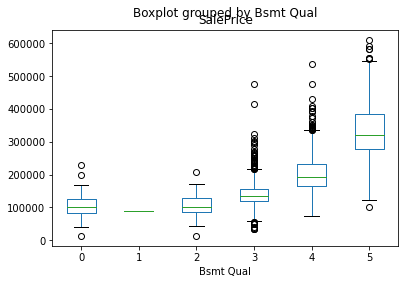

In [153]:
train12.boxplot(by ='Bsmt Qual', column =['SalePrice'], grid = False);
# no data for poor condition
#Generally property with data sells higher

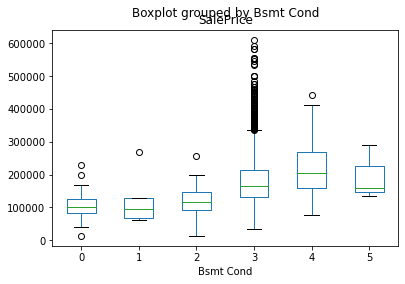

In [154]:
train12.boxplot(by ='Bsmt Cond', column =['SalePrice'], grid = False);
#generally basement property sell higher. poor quality basement and no basement mean sale price are similar

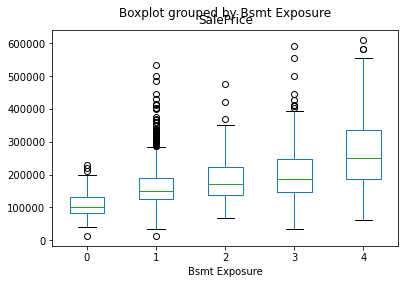

In [155]:
train12.boxplot(by ='Bsmt Exposure', column =['SalePrice'], grid = False);
#all basement characteristics show similar results

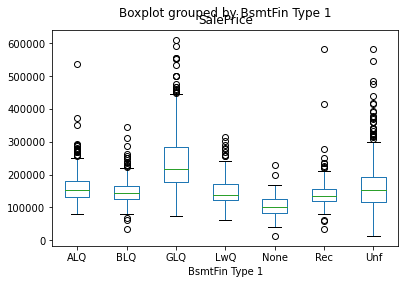

In [156]:
train7.boxplot(by ='BsmtFin Type 1', column =['SalePrice'], grid = False);
#GLQ , good living quaters, have higher sales price

In [157]:
train1['BsmtFin Type 1'].value_counts()

GLQ    613
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


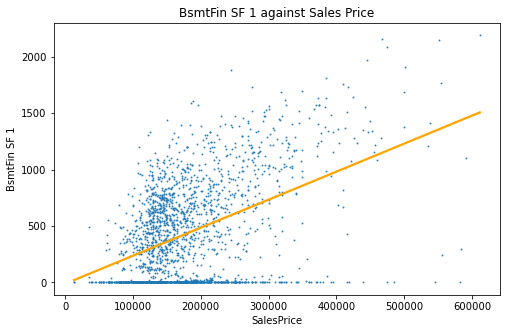

In [158]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'BsmtFin SF 1', train12, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('BsmtFin SF 1')
plt.title('BsmtFin SF 1 against Sales Price');

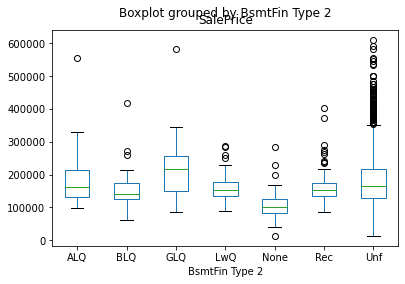

In [159]:
train7.boxplot(by ='BsmtFin Type 2', column =['SalePrice'], grid = False);

In [160]:
train1['BsmtFin Type 2'].value_counts()

Unf    1747
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


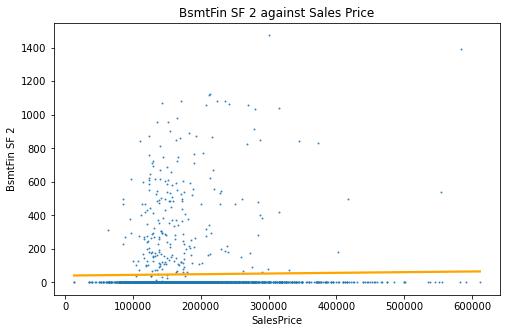

In [161]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'BsmtFin SF 2', train12, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('BsmtFin SF 2')
plt.title('BsmtFin SF 2 against Sales Price');

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


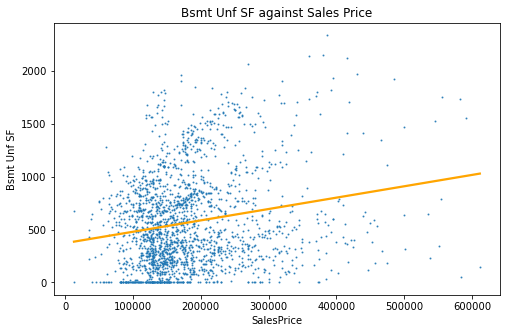

In [162]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Bsmt Unf SF', train12, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Bsmt Unf SF')
plt.title('Bsmt Unf SF against Sales Price');
#price is likely to be higher when there is higher Unfinished square feet of basement area

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


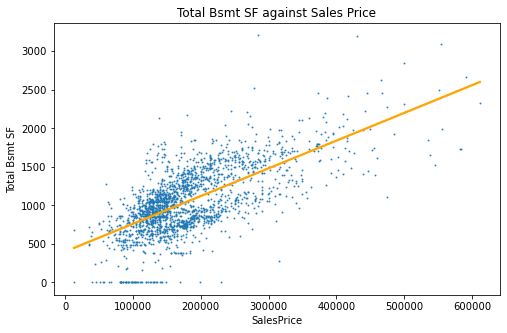

In [163]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Total Bsmt SF', train12, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Total Bsmt SF')
plt.title('Total Bsmt SF against Sales Price');

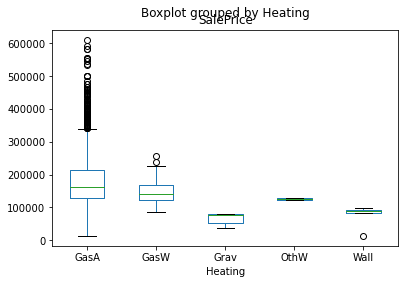

In [164]:
train7.boxplot(by ='Heating', column =['SalePrice'], grid = False);
#no data for floor furnance

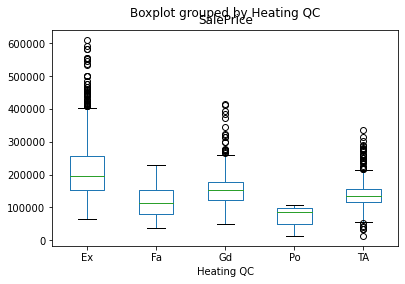

In [165]:
train7.boxplot(by ='Heating QC', column =['SalePrice'], grid = False);

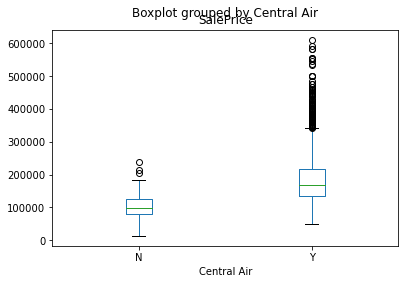

In [166]:
train7.boxplot(by ='Central Air', column =['SalePrice'], grid = False);
#with central air, air conditioning, sale price is higher

Central Air would have higher sale price

In [167]:
train7['Central Air'].value_counts()

Y    1883
N     141
Name: Central Air, dtype: int64

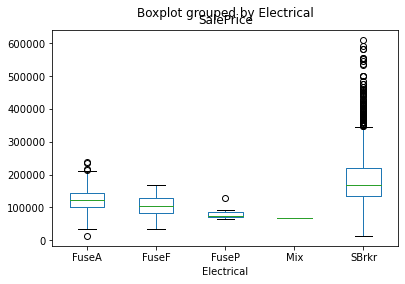

In [168]:
train7.boxplot(by ='Electrical', column =['SalePrice'], grid = False);

In [169]:
train7['Electrical'].value_counts()

SBrkr    1842
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


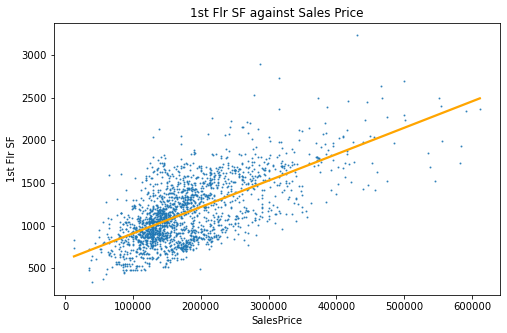

In [170]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', '1st Flr SF', train12, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('1st Flr SF')
plt.title('1st Flr SF against Sales Price');

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


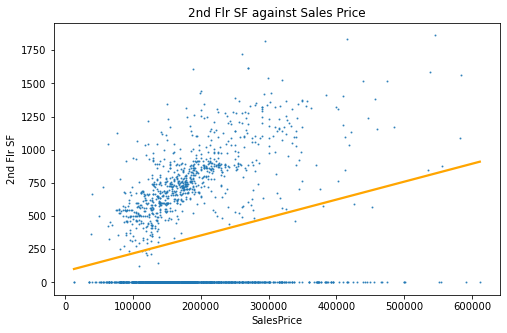

In [171]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', '2nd Flr SF', train12, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('2nd Flr SF')
plt.title('2nd Flr SF against Sales Price');

#there are many data that have the value of 0 for 2nd Flr SF (Continuous): Second floor square feet

Higher floor space, higher sale price

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


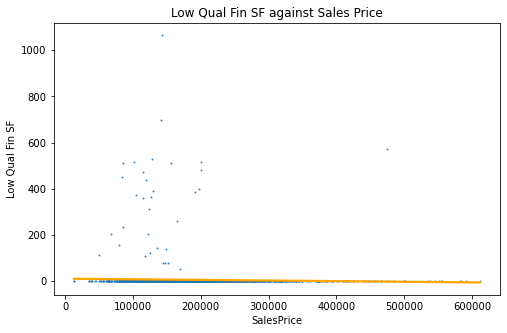

In [172]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Low Qual Fin SF', train12, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Low Qual Fin SF')

plt.title('Low Qual Fin SF against Sales Price');

#Low Qual Fin SF (Continuous): Low quality finished square feet (all floors) seem to be a poor feature to predict sales price.
#might want to consider dropping this

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


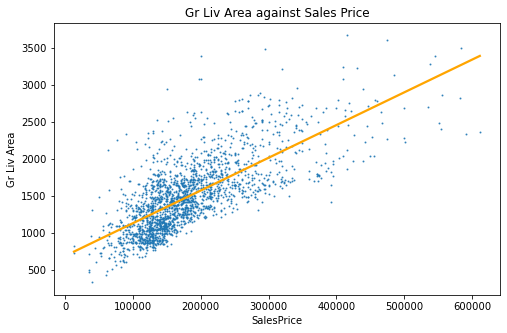

In [173]:

plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Gr Liv Area', train12, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Gr Liv Area')

plt.title('Gr Liv Area against Sales Price');

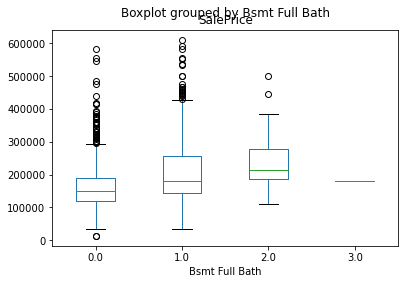

In [174]:
train7.boxplot(by ='Bsmt Full Bath', column =['SalePrice'], grid = False);
# generally have more Basement full bathrooms would result in higher selling price.
#too little data for 3

In [175]:
train7['Bsmt Full Bath'].value_counts()

0.0    1187
1.0     813
2.0      22
3.0       2
Name: Bsmt Full Bath, dtype: int64

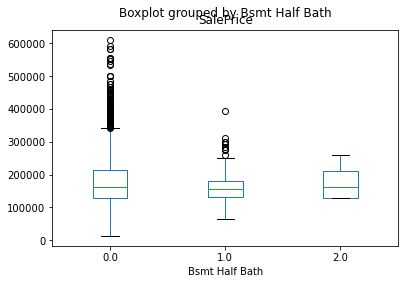

In [176]:
train7.boxplot(by ='Bsmt Half Bath', column =['SalePrice'], grid = False);

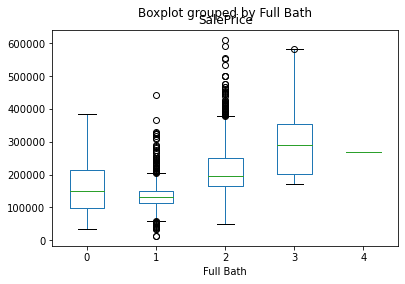

In [177]:
train7.boxplot(by ='Full Bath', column =['SalePrice'], grid = False);
# generally have more Basement full bathrooms would result in higher selling price.
#too little data for 3


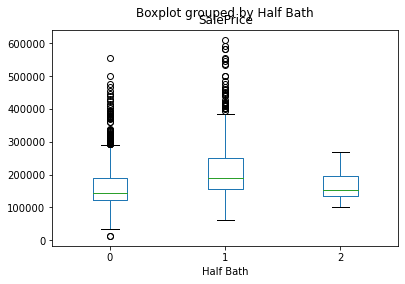

In [178]:
train7.boxplot(by ='Half Bath', column =['SalePrice'], grid = False);
#too little data for 3


generally have more bathrooms would result in higher selling price. Half bath doesnt seem to affect sale price much

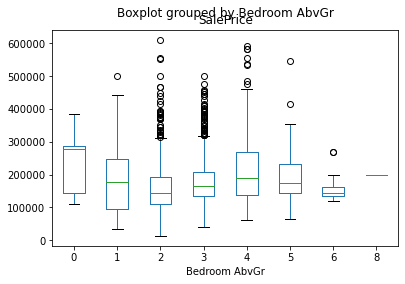

In [179]:
train7.boxplot(by ='Bedroom AbvGr', column =['SalePrice'], grid = False);

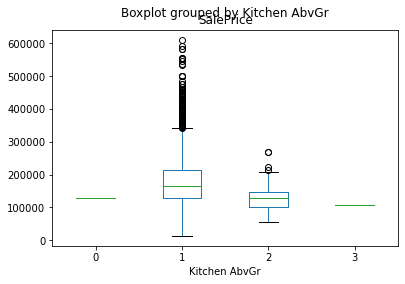

In [180]:
train7.boxplot(by ='Kitchen AbvGr', column =['SalePrice'], grid = False);

In [181]:
train7['Kitchen AbvGr'].value_counts()

1    1934
2      87
0       2
3       1
Name: Kitchen AbvGr, dtype: int64

In [182]:
train7['Kitchen AbvGr'].corr(train7['SalePrice'])

-0.12626007634002412

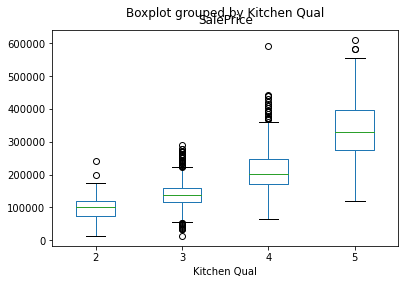

In [183]:
train12.boxplot(by ='Kitchen Qual', column =['SalePrice'], grid = False);

# no data for fair and poor kitchen quality. 
# higher quality kitchens would have higher sale price.

Most property have 1 kitchen only hence the sale price for more than 1 kitchen would not be very realiable. there is a very distinct pattern for quality of kitchen. the higher quality of kitchen, the higher the sale price

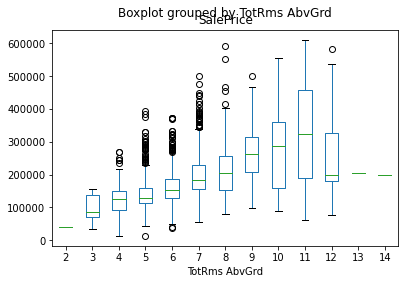

In [184]:
train12.boxplot(by ='TotRms AbvGrd', column =['SalePrice'], grid = False);
#generally more rooms above ground would result in higher sales price till anything after 11

Generally more TotRms AbvGrd, higher the Sale price

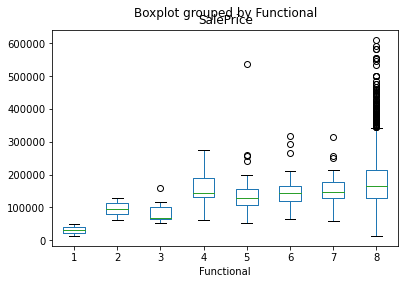

In [185]:
train12.boxplot(by ='Functional', column =['SalePrice'], grid = False);

#apart from maj2, sev, sal, others seem pretty much similar.

In [186]:
train7['Functional'].value_counts()

Typ     1889
Min2      42
Min1      42
Mod       29
Maj1      11
Maj2       7
Sev        2
Sal        2
Name: Functional, dtype: int64

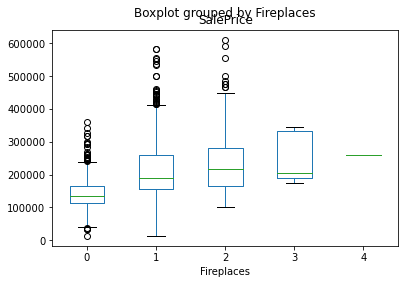

In [187]:
train12.boxplot(by ='Fireplaces', column =['SalePrice'], grid = False);
#more fireplaces, likely to have higher sale price
#little data for 4 fireplaces

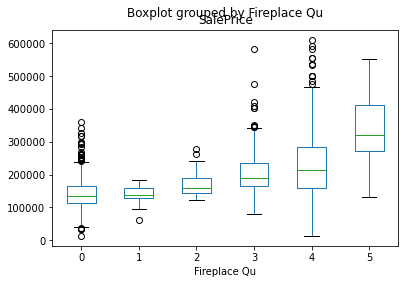

In [188]:
train12.boxplot(by ='Fireplace Qu', column =['SalePrice'], grid = False);
#higher quality fireplace result in higher sale price

Generally more fireplaces and higher fireplace quality would have higher sale price

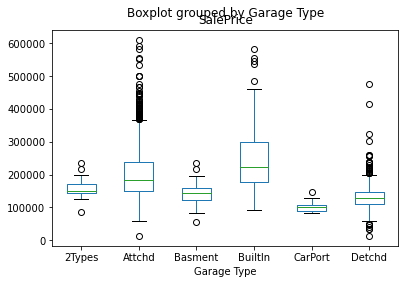

In [189]:
train7.boxplot(by ='Garage Type', column =['SalePrice'], grid = False);
#no data for no garage.

In [190]:
train7['Garage Yr Blt'].value_counts()

None      112
2005.0    104
2006.0     77
2007.0     77
2004.0     72
         ... 
1896.0      1
1918.0      1
1933.0      1
1895.0      1
1919.0      1
Name: Garage Yr Blt, Length: 100, dtype: int64

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


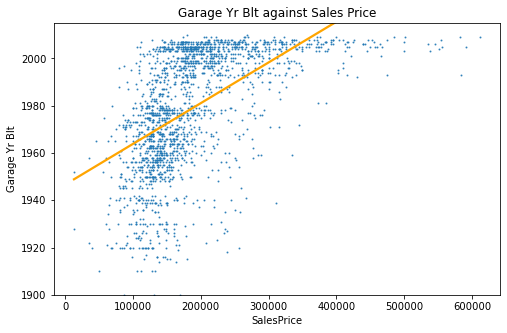

In [191]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Garage Yr Blt', train1, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Garage Yr Blt')
plt.ylim([1900, 2015])

plt.title('Garage Yr Blt against Sales Price');
# train7.boxplot(by ='Garage Yr Blt', column =['SalePrice'], grid = False);

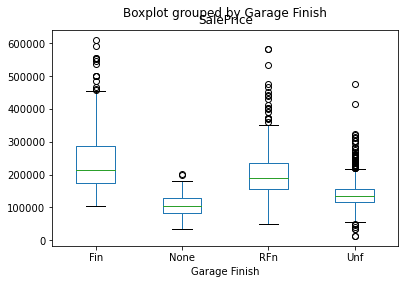

In [192]:
train7.boxplot(by ='Garage Finish', column =['SalePrice'], grid = False);

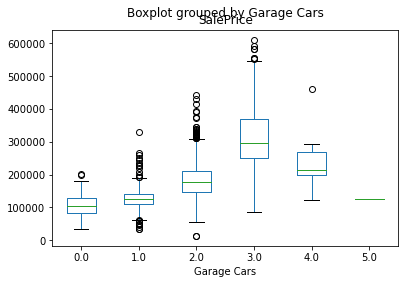

In [193]:
train7.boxplot(by ='Garage Cars', column =['SalePrice'], grid = False);
#after capacity >3 , sale price decrease

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


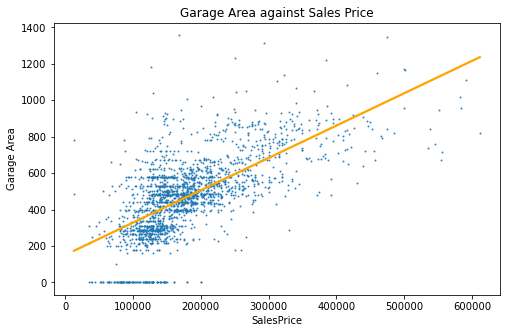

In [194]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Garage Area', train7, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Garage Area')

plt.title('Garage Area against Sales Price');

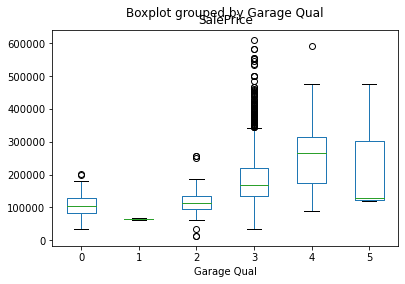

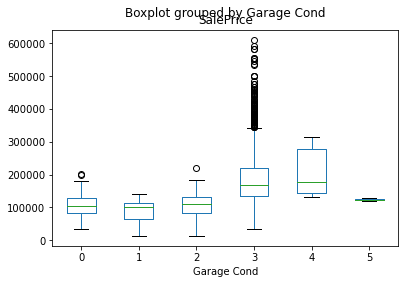

In [195]:
train12.boxplot(by ='Garage Qual', column =['SalePrice'], grid = False);
train12.boxplot(by ='Garage Cond', column =['SalePrice'], grid = False);

#generally sale price increases with garage quality. however anything more than good
# there wouldnt be a increase, might be due to lack of sufficient data

Better garage condition and quality would sell higher generally. Bigger space for Garage would also sell higher. Younger garage sell higher. 

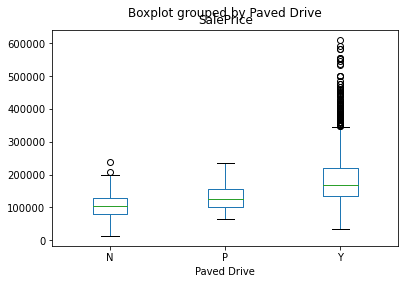

In [196]:
train7.boxplot(by ='Paved Drive', column =['SalePrice'], grid = False);

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


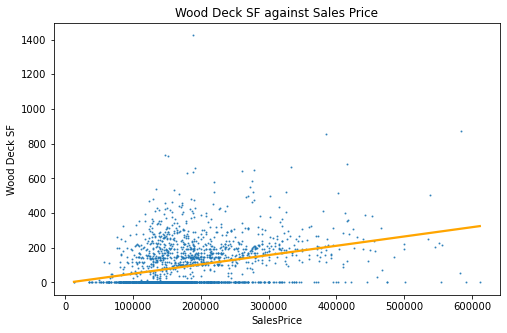

In [197]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Wood Deck SF', train7, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Wood Deck SF')

plt.title('Wood Deck SF against Sales Price');

In [198]:
train7['Wood Deck SF'].value_counts()

0      1061
100      50
144      45
192      43
120      40
       ... 
26        1
432       1
219       1
232       1
241       1
Name: Wood Deck SF, Length: 320, dtype: int64

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


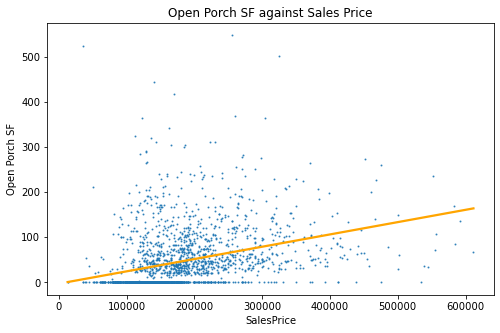

In [199]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Open Porch SF', train7, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Open Porch SF')

plt.title('Open Porch SF against Sales Price');

In [200]:
train7['Open Porch SF'].value_counts()

0      904
36      38
48      38
40      34
32      29
      ... 
547      1
106      1
278      1
205      1
276      1
Name: Open Porch SF, Length: 219, dtype: int64

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


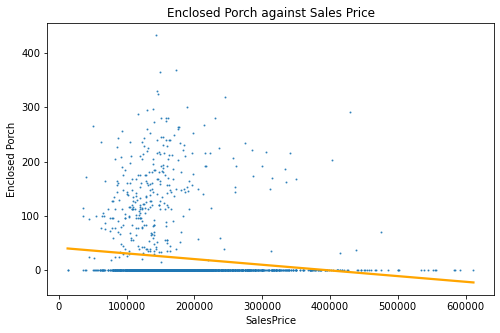

In [201]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Enclosed Porch', train7, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Enclosed Porch')

plt.title('Enclosed Porch against Sales Price');

#many 0 values

In [202]:
train7['Enclosed Porch'].value_counts()

0      1700
112      13
96       10
40        6
216       6
       ... 
50        1
26        1
109       1
239       1
67        1
Name: Enclosed Porch, Length: 158, dtype: int64

Enclosed porch pattern against sale price might not be accurate considering that 1700/2024 property does not have any enclosed porched.

In [203]:
train7['Enclosed Porch'].corr(train7['SalePrice'])

-0.1381026426931752

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


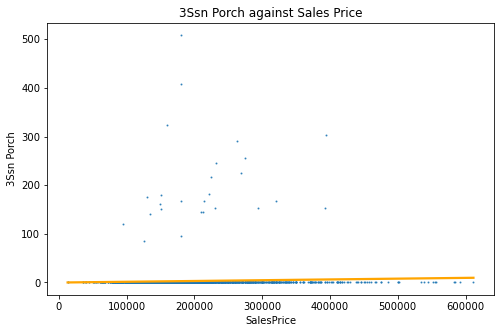

In [204]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', '3Ssn Porch', train7, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('3Ssn Porch')

plt.title('3Ssn Porch against Sales Price');

In [205]:
train7['3Ssn Porch'].value_counts()

0      1998
168       3
153       3
144       2
140       1
290       1
182       1
245       1
216       1
86        1
323       1
96        1
180       1
176       1
508       1
255       1
150       1
407       1
120       1
162       1
224       1
304       1
Name: 3Ssn Porch, dtype: int64

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


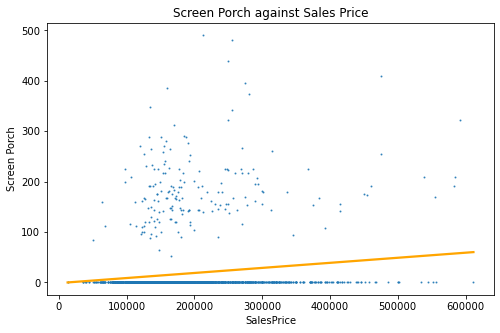

In [206]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Screen Porch', train7, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Screen Porch')

plt.title('Screen Porch against Sales Price');

In [207]:
train7['Screen Porch'].value_counts()

0      1843
144       9
168       8
192       7
180       7
       ... 
53        1
135       1
141       1
348       1
190       1
Name: Screen Porch, Length: 100, dtype: int64

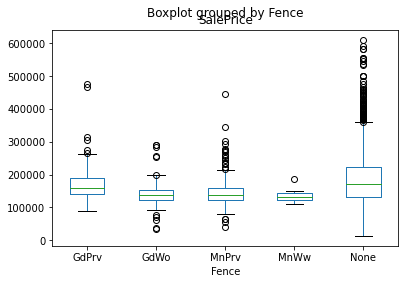

In [208]:
train7.boxplot(by ='Fence', column =['SalePrice'], grid = False);
#seems like fence or without fence, sale price isnt affected. 

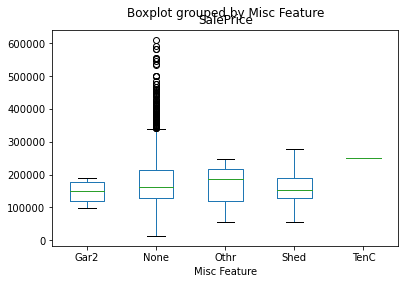

In [209]:
train7.boxplot(by ='Misc Feature', column =['SalePrice'], grid = False);
# no data for Elev, Elevator

In [210]:
train7['Misc Feature'].value_counts()

None    1960
Shed      56
Gar2       4
Othr       3
TenC       1
Name: Misc Feature, dtype: int64

C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


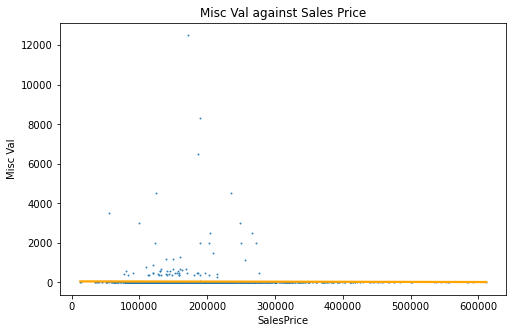

In [211]:
plt.figure(figsize = (8, 5))
sns.regplot('SalePrice', 'Misc Val', train7, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.xlabel('SalesPrice')
plt.ylabel('Misc Val')

plt.title('Misc Val against Sales Price');

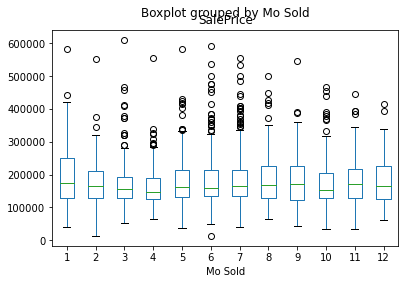

In [212]:
train7.boxplot(by ='Mo Sold', column =['SalePrice'], grid = False);
#month sold , doesnt seem to have a impact on sales price

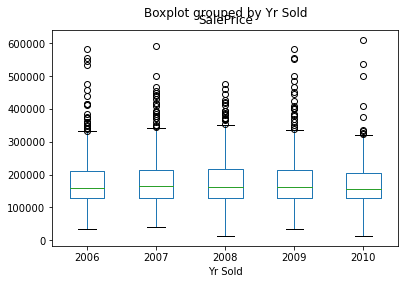

In [213]:
train7.boxplot(by ='Yr Sold', column =['SalePrice'], grid = False);
#year sold , doesnt seem to have a impact on sales price

Year and month sold does not seem to have much impact as the mean and range for each of the year/month are similar

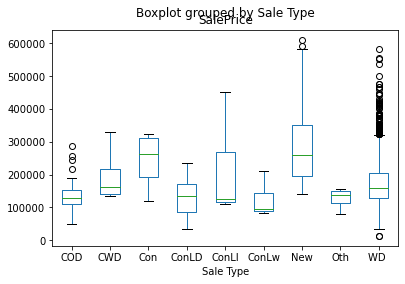

In [214]:
train7.boxplot(by ='Sale Type', column =['SalePrice'], grid = False);
#highest seem to be from New, Home just constructed and sold

In [215]:
train7['Sale Type'].value_counts()

WD       1768
New       147
COD        63
ConLD      16
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: Sale Type, dtype: int64

In [216]:
train7['Sale Type'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2024 entries, 0 to 2050
Series name: Sale Type
Non-Null Count  Dtype 
--------------  ----- 
2024 non-null   object
dtypes: object(1)
memory usage: 31.6+ KB


    
<span style="background-color: #FFFF00">EDA Summary:</span>   
While it is likely that we are able to use all these features and its data to construct machine learning models to predict the sales price, it is not very ideal as there are multiple features that are highly skewed with very little data for the individual catagory. Lesser data would result in a range of results that are less likely to properly represent the feature catagory. For example, there is only 5 data (out of 2024 data) for ConLw in Sale Type Feature that have a total of 9 features. If we were to use this feature to construct the model without any feature engineering, its likely that the model would not be able to predict property that fall in to catagory ConLw very accurately; more likely to make a prediction that of higher RMSE hence poor score.

## Feature Engineering

In [217]:
train12.to_csv('../datasets/train12.csv')

In [218]:
train12.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [219]:
train13 = train7.drop(columns=['Id','PID'])
train13['Exter Qual'] = train12['Exter Qual']
train13['Exter Cond'] = train12['Exter Cond']
train13['Bsmt Qual'] = train12['Bsmt Qual']
train13['Bsmt Cond'] = train12['Bsmt Cond']
train13['Bsmt Exposure'] = train12['Bsmt Exposure']
train13['Heating QC'] = train12['Heating QC']
train13['Kitchen Qual'] = train12['Kitchen Qual']
train13['Fireplace Qu'] = train12['Fireplace Qu']
train13['Garage Finish'] = train12['Garage Finish']
train13['Garage Qual'] = train12['Garage Qual']
train13['Garage Cond'] = train12['Garage Cond']
train13['Functional'] = train12['Functional']
train13['MS Zoning'] = train1['MS Zoning']
train13['Street'] = train1['Street']
train13['Neighborhood'] = train1['Neighborhood']
train13['BsmtFin Type 2'] = train11['BsmtFin Type 2']
train13['BsmtFin Type 1'] = train11['BsmtFin Type 1']

In [220]:
train14 = train13

In [221]:
train7.groupby('Heating')['SalePrice'].mean()

Heating
GasA    181869.200402
GasW    151275.000000
Grav     65180.000000
OthW    125750.000000
Wall     77150.000000
Name: SalePrice, dtype: float64

In [222]:
train7.groupby('Heating')['SalePrice'].mean().sum()

601224.2004018081

In [223]:
# Numarizing Heating to enable combining column Heating and Heating QC
# Average saleprice/total average
# GasA = 181869.200402/601224.2004018081
# GasW = 151275/601224.2004018081
# Grav = 65180/601224.2004018081
# OthW = 125750.000000/601224.2004018081
# Wall = 77150.000000/601224.2004018081

In [224]:
assignindex = {181869.200402/601224.2004018081: 'GasA',
 151275/601224.2004018081: 'GasW',
 65180/601224.2004018081: 'Grav',
 125750.000000/601224.2004018081: 'OthW',
 77150.000000/601224.2004018081: 'Wall'}
assignindex = {v: k for k, v in assignindex.items()}
train14 = train14.replace({'Heating': assignindex})

In [225]:
train13.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [226]:
#forming new columns features by combining old features and removal of these old features.

In [227]:
#combining Overall Qual and Overall Cond data into 1 column
train14['Overall Qual Cond'] = train14['Overall Qual'] * train14['Overall Cond']
train14 = train14.drop(columns=['Overall Qual','Overall Cond'])

#combining Exter Qual and Exter Cond data into 1 column
train14['Exter Qual Cond'] = train14['Exter Qual'] * train14['Exter Cond']
train14 = train14.drop(columns=['Exter Qual','Exter Cond'])

#combining Bsmt Qual and Bsmt Cond and Bsmt Exposure data into 1 column
train14['Bsmt Qual Cond Exposure'] = train14['Bsmt Qual'] * train14['Bsmt Cond'] * train14['Bsmt Exposure']
train14 = train14.drop(columns=['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure'])

#combining all basement values to 1 column
train14['Bsmt']=train14['BsmtFin Type 1']*train14['BsmtFin SF 1']+train14['BsmtFin Type 2']*train14['BsmtFin SF 2']+((train14['Bsmt Unf SF']+train14['Total Bsmt SF'])*train14['Bsmt Qual Cond Exposure'])  
train14 = train14.drop(columns=['Bsmt Qual Cond Exposure','BsmtFin Type 1', 'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2','Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Qual Cond Exposure'])

#combining Kitchen and Kitchen Qual data into 1 column
train14['Kitchen and Qual'] = train14['Kitchen Qual'] * train14['Kitchen AbvGr']
train14 = train14.drop(columns=['Kitchen AbvGr','Kitchen Qual'])

#combining Fireplaces and Fireplace Qu data into 1 column
train14['Fireplaces and Qual'] = train14['Fireplace Qu'] * train14['Fireplaces']
train14 = train14.drop(columns=['Fireplaces','Fireplace Qu'])

#combining Garage Area, Garage Qual, Garage finish and Garage Cond data into 1 column
train14['Garage'] = train14['Garage Cond'] * train14['Garage Qual']* train14['Garage Area'] *train14['Garage Finish'] *train14['Garage Cars'] 
train14 = train14.drop(columns=['Garage Cond','Garage Qual', 'Garage Area', 'Garage Finish', 'Garage Cars'])

#combining Open Porch SF, 3-Ssn Porch, Screen Porch data into 1 column
#Drop Enclosed Porch column
train14['Porch total'] = train14['Open Porch SF'] + train14['3Ssn Porch'] + train14['Screen Porch']
train14 = train14.drop(columns=['Open Porch SF','3Ssn Porch','Screen Porch', 'Enclosed Porch'])

#combining year built and year sold to age
train14['Age'] = train14['Yr Sold'] - train14['Year Built']
train14 = train14.drop(columns=['Year Built','Yr Sold'])

#combining Heating and Heating QC
train14['HeatingMod'] = train14['Heating'] * train14['Heating QC']
train14 = train14.drop(columns=['Heating','Heating QC'])

In [228]:
assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po'}
assignindex = {v: k for k, v in assignindex.items()}
test = test.replace({'Exter Qual': assignindex})


assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po'}
assignindex = {v: k for k, v in assignindex.items()}
test= test.replace({'Exter Cond': assignindex})

assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po',
 0: 'None'}
assignindex = {v: k for k, v in assignindex.items()}
test = test.replace({'Bsmt Qual': assignindex})


assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po',
 0: 'None'}

assignindex = {v: k for k, v in assignindex.items()}
test= test.replace({'Bsmt Qual': assignindex})


assignindex = { 5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po',
 0: 'None',}
assignindex = {v: k for k, v in assignindex.items()}
test = test.replace({'Bsmt Cond': assignindex})


assignindex = {4: 'Gd',
 3: 'Av',
 2: 'Mn',
 1: 'No',
 0: 'None',}
assignindex = {v: k for k, v in assignindex.items()}
test = test.replace({'Bsmt Exposure': assignindex})


assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po'}
assignindex = {v: k for k, v in assignindex.items()}
test = test.replace({'Heating QC': assignindex})

assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po'}
assignindex = {v: k for k, v in assignindex.items()}
test = test.replace({'Kitchen Qual': assignindex})


assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po',
 0: 'None'}
assignindex = {v: k for k, v in assignindex.items()}
test = test.replace({'Fireplace Qu': assignindex})

assignindex = {
 3: 'Fin',
 2: 'RFn',
 1: 'Unf',
 0: 'None'}
assignindex = {v: k for k, v in assignindex.items()}
test = test.replace({'Garage Finish': assignindex})

assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po',
 0: 'None'}
assignindex = {v: k for k, v in assignindex.items()}
test= test.replace({'Garage Qual': assignindex})

assignindex = {5: 'Ex',
 4: 'Gd',
 3: 'TA',
 2: 'Fa',
 1: 'Po',
 0: 'None'}
assignindex = {v: k for k, v in assignindex.items()}
test= test.replace({'Garage Cond': assignindex})

assignindex = {8: 'Typ',
 7: 'Min1',
 6: 'Min2',
 5: 'Mod',
 4: 'Maj1',
 3: 'Maj2',
 2: 'Sev',
 1: 'Sal'}
assignindex = {v: k for k, v in assignindex.items()}
test= test.replace({'Functional': assignindex})


assignindex = {6: 'GLQ',
 5: 'ALQ',
 4: 'BLQ',
 3: 'Rec',
 2: 'LwQ',
 1: 'Unf',
 0: 'None',}
assignindex = {v: k for k, v in assignindex.items()}
test = test.replace({'BsmtFin Type 2': assignindex})


assignindex = {6: 'GLQ',
 5: 'ALQ',
 4: 'BLQ',
 3: 'Rec',
 2: 'LwQ',
 1: 'Unf',
 0: 'None',}
assignindex = {v: k for k, v in assignindex.items()}
test= test.replace({'BsmtFin Type 1': assignindex})

assignindex = {181869.200402/601224.2004018081: 'GasA',
               0: 'Floor',
 151275/601224.2004018081: 'GasW',
 65180/601224.2004018081: 'Grav',
 125750.000000/601224.2004018081: 'OthW',
 77150.000000/601224.2004018081: 'Wall'}
assignindex = {v: k for k, v in assignindex.items()}
test = test.replace({'Heating': assignindex})

In [229]:
test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [230]:
test.fillna(0, inplace = True)

In [231]:
#doing same for test

#combining Overall Qual and Overall Cond data into 1 column
test['Overall Qual Cond'] = test['Overall Qual'] * test['Overall Cond']
test = test.drop(columns=['Overall Qual','Overall Cond'])

#combining Exter Qual and Exter Cond data into 1 column
test['Exter Qual Cond'] = test['Exter Qual'] * test['Exter Cond']
test = test.drop(columns=['Exter Qual','Exter Cond'])

#combining Bsmt Qual and Bsmt Cond and Bsmt Exposure data into 1 column
test['Bsmt Qual Cond Exposure'] = test['Bsmt Qual'] * test['Bsmt Cond'] * test['Bsmt Exposure']
test = test.drop(columns=['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure'])

#combining all basement values to 1 column
test['Bsmt']=test['BsmtFin Type 1']*test['BsmtFin SF 1']+test['BsmtFin Type 2']*test['BsmtFin SF 2']+((test['Bsmt Unf SF']+test['Total Bsmt SF'])*test['Bsmt Qual Cond Exposure'])  
test = test.drop(columns=['Bsmt Qual Cond Exposure','BsmtFin Type 1', 'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2','Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Qual Cond Exposure'])

#combining Kitchen and Kitchen Qual data into 1 column
test['Kitchen and Qual'] = test['Kitchen Qual'] * test['Kitchen AbvGr']
test = test.drop(columns=['Kitchen AbvGr','Kitchen Qual'])

#combining Fireplaces and Fireplace Qu data into 1 column
test['Fireplaces and Qual'] = test['Fireplace Qu'] * test['Fireplaces']
test = test.drop(columns=['Fireplaces','Fireplace Qu'])

#combining Garage Area, Garage Qual, Garage finish and Garage Cond data into 1 column
test['Garage'] = test['Garage Cond'] * test['Garage Qual']* test['Garage Area'] *test['Garage Finish'] *test['Garage Cars'] 
test = test.drop(columns=['Garage Cond','Garage Qual', 'Garage Area', 'Garage Finish', 'Garage Cars'])

#combining Open Porch SF, 3-Ssn Porch, Screen Porch data into 1 column
#Drop Enclosed Porch column
test['Porch total'] = test['Open Porch SF'] + test['3Ssn Porch'] + test['Screen Porch']
test = test.drop(columns=['Open Porch SF','3Ssn Porch','Screen Porch', 'Enclosed Porch'])

#combining year built and year sold to age
test['Age'] = test['Yr Sold'] - test['Year Built']
test = test.drop(columns=['Year Built','Yr Sold'])

#combining Heating and Heating QC
test['HeatingMod'] = test['Heating'] * test['Heating QC']
test = test.drop(columns=['Heating','Heating QC'])



In [232]:
train14= train14.drop(columns=['Misc Val','Misc Feature', 'Utilities','Mo Sold','Garage Yr Blt', 'Fence', 'Bldg Type', 'Lot Config', 'Land Slope', 'House Style', 'Roof Style', 'Roof Matl', 'Land Contour', 'Lot Shape', 'Half Bath','Bedroom AbvGr', 'Condition 1', 'Condition 2', 'Electrical', 'Central Air'])
# features that does not affect Sales Price much, too little data to make feature distinct or no distinct trend against SalesPrice

In [233]:
test= test.drop(columns=['Id', 'PID', 'Misc Val','Misc Feature', 'Utilities','Mo Sold','Garage Yr Blt', 'Fence', 'Bldg Type', 'Lot Config', 'Land Slope', 'House Style', 'Roof Style', 'Roof Matl', 'Land Contour', 'Lot Shape', 'Half Bath','Bedroom AbvGr', 'Condition 1', 'Condition 2', 'Electrical', 'Central Air'])

In [234]:
train14.shape

(2024, 36)

In [235]:
train14.to_csv('../datasets/train7.csv')

In [236]:
print(train14.corr()['SalePrice'].sort_values())

Age                   -0.572322
MS SubClass           -0.085332
Bsmt Half Bath        -0.044108
Low Qual Fin SF       -0.041166
Functional             0.126803
Lot Frontage           0.183445
2nd Flr SF             0.251325
Bsmt Full Bath         0.285615
Lot Area               0.303137
Wood Deck SF           0.329865
Porch total            0.331748
Kitchen and Qual       0.455646
HeatingMod             0.457589
TotRms AbvGrd          0.511007
Mas Vnr Area           0.520501
Fireplaces and Qual    0.522129
Full Bath              0.538732
Year Remod/Add         0.549903
Overall Qual Cond      0.565561
Exter Qual Cond        0.597062
1st Flr SF             0.654694
Bsmt                   0.691713
Gr Liv Area            0.721925
Garage                 0.759941
SalePrice              1.000000
Name: SalePrice, dtype: float64


In [237]:
train14['Garage Type'].fillna(0, inplace=True)

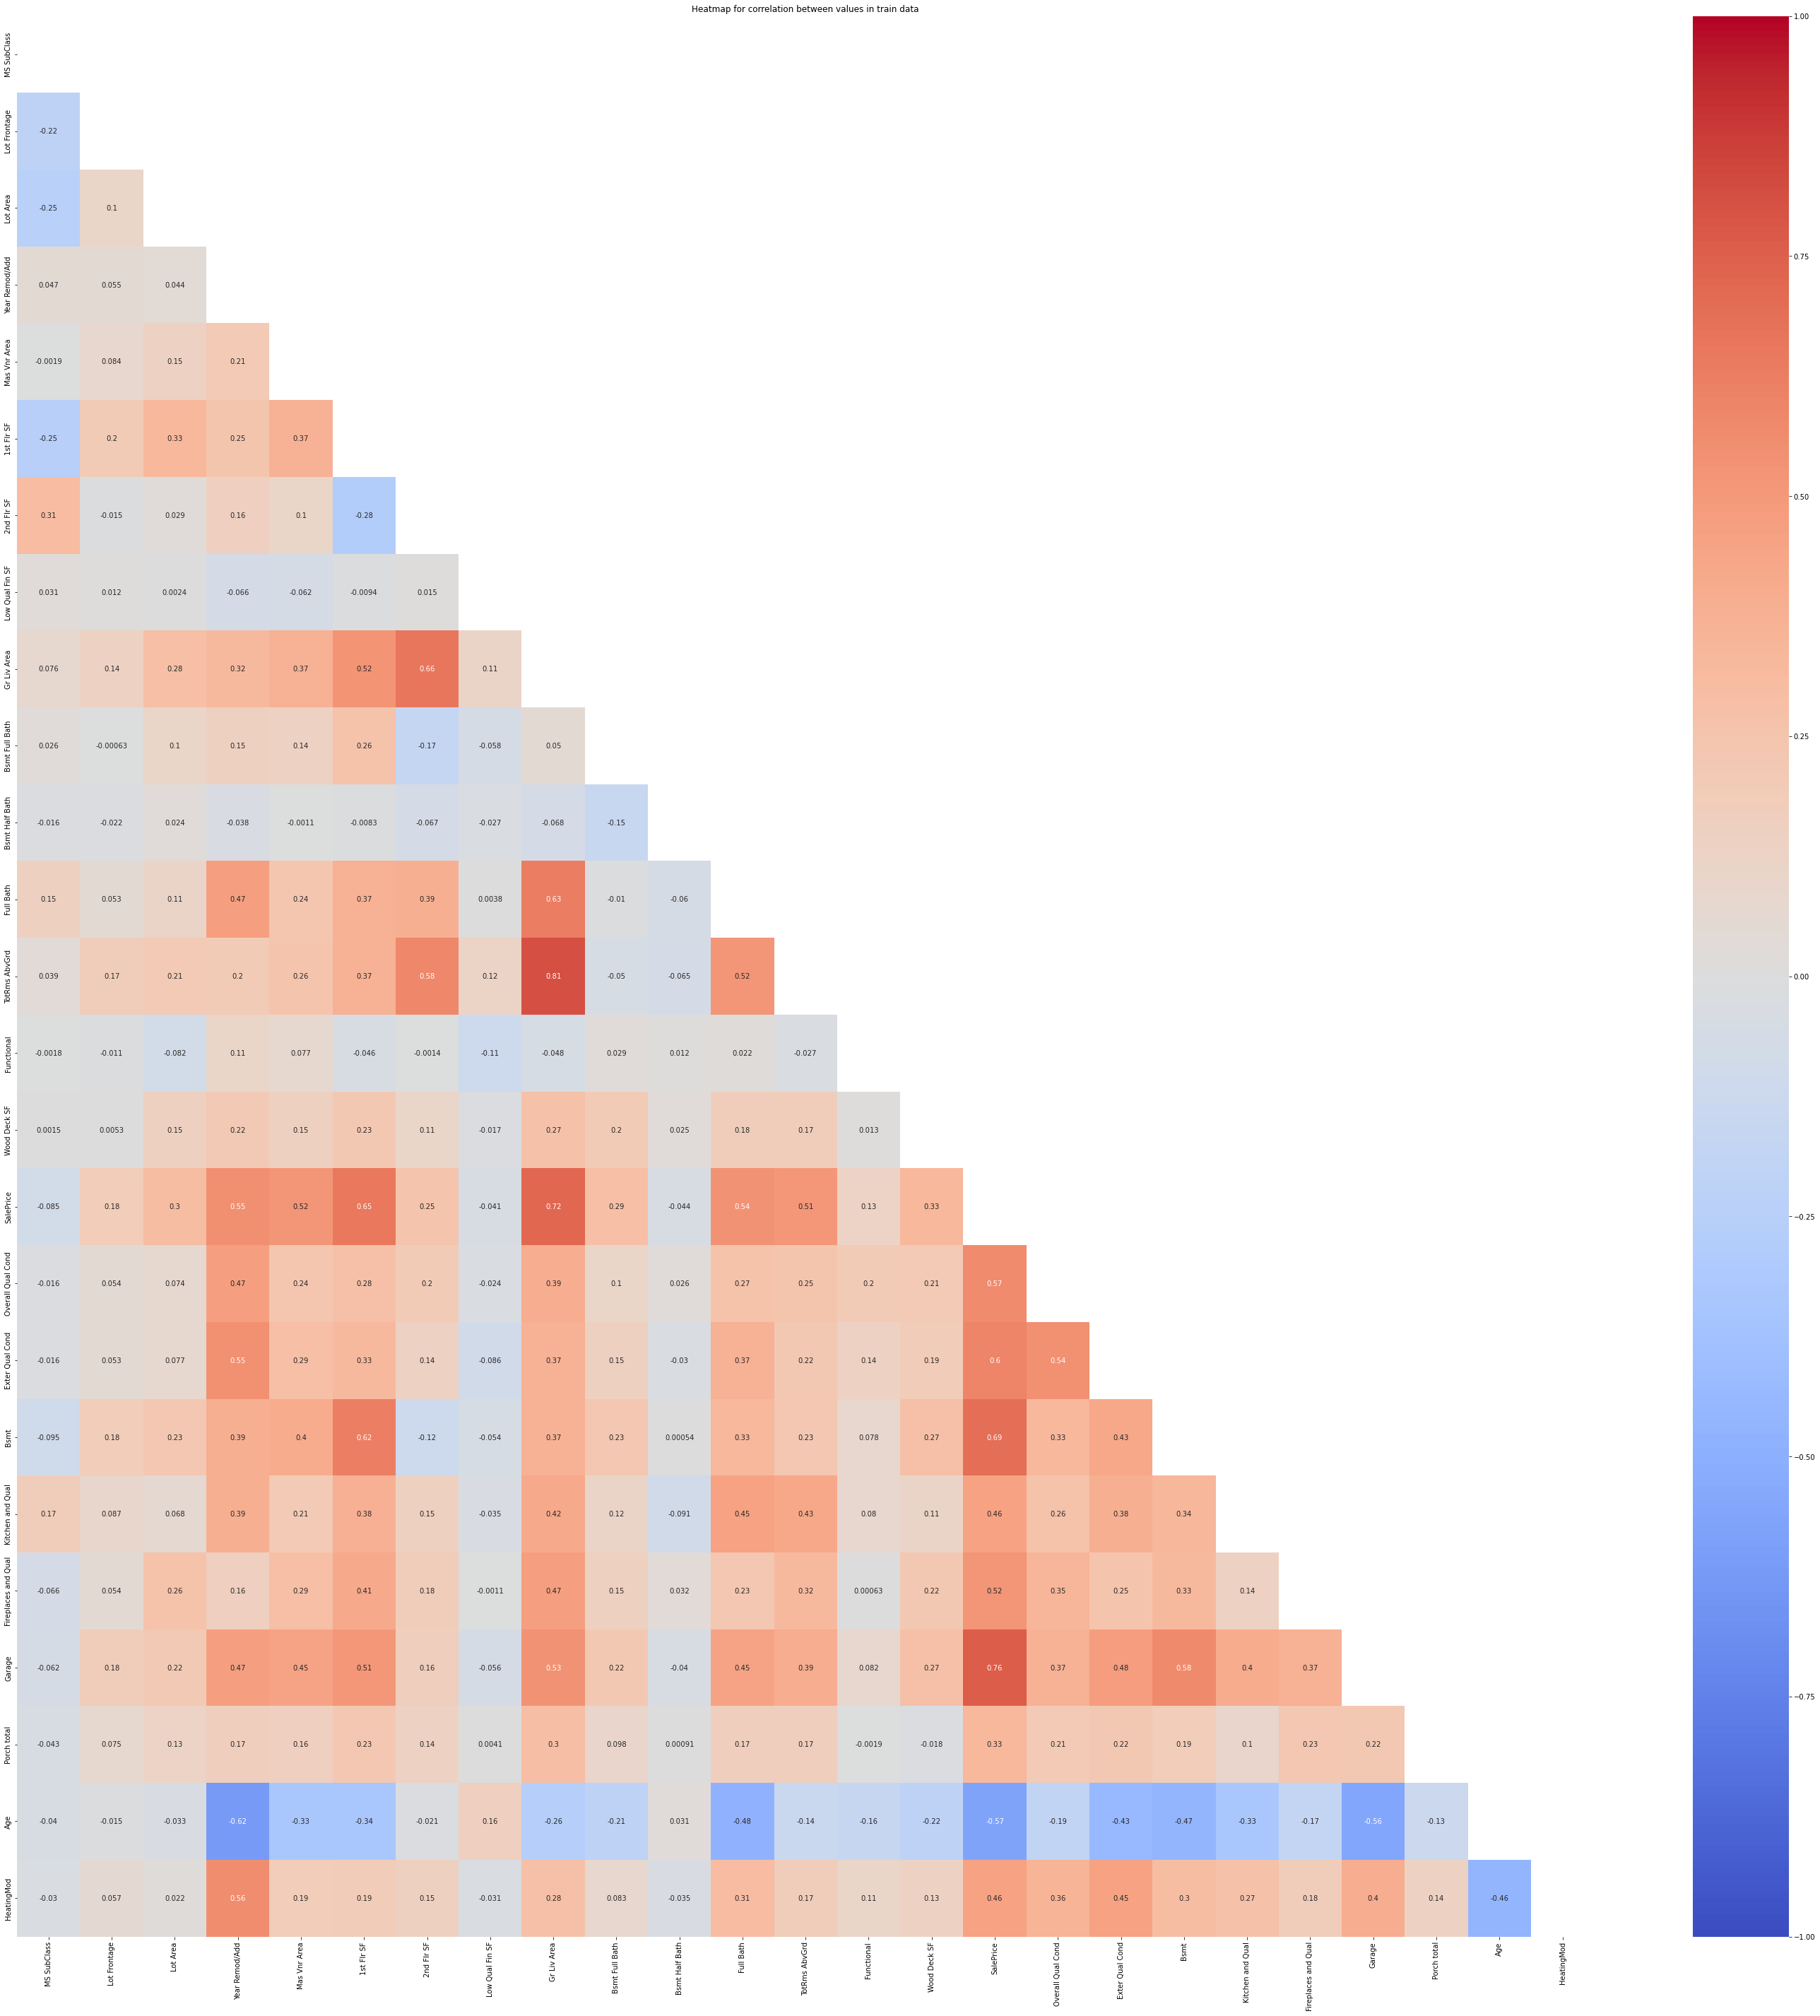

In [238]:
matrix = train14.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(50,50))
sns.heatmap(train14.corr(), mask=mask, annot=True, vmin = -1, vmax=1, cmap='coolwarm').set(title= 'Heatmap for correlation between values in train data');

Correlation chart and values to see which feature should be considered. we want a feature that is further away from 0.

In [239]:
train14.isnull().sum()

MS SubClass            0
MS Zoning              0
Lot Frontage           0
Lot Area               0
Street                 0
Alley                  0
Neighborhood           0
Year Remod/Add         0
Exterior 1st           0
Exterior 2nd           0
Mas Vnr Type           0
Mas Vnr Area           0
Foundation             0
1st Flr SF             0
2nd Flr SF             0
Low Qual Fin SF        0
Gr Liv Area            0
Bsmt Full Bath         0
Bsmt Half Bath         0
Full Bath              0
TotRms AbvGrd          0
Functional             0
Garage Type            0
Paved Drive            0
Wood Deck SF           0
Sale Type              0
SalePrice              0
Overall Qual Cond      0
Exter Qual Cond        0
Bsmt                   0
Kitchen and Qual       0
Fireplaces and Qual    0
Garage                 0
Porch total            0
Age                    0
HeatingMod             0
dtype: int64

In [240]:
train14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 2050
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MS SubClass          2024 non-null   int64  
 1   MS Zoning            2024 non-null   object 
 2   Lot Frontage         2024 non-null   float64
 3   Lot Area             2024 non-null   int64  
 4   Street               2024 non-null   object 
 5   Alley                2024 non-null   object 
 6   Neighborhood         2024 non-null   object 
 7   Year Remod/Add       2024 non-null   int64  
 8   Exterior 1st         2024 non-null   object 
 9   Exterior 2nd         2024 non-null   object 
 10  Mas Vnr Type         2024 non-null   object 
 11  Mas Vnr Area         2024 non-null   float64
 12  Foundation           2024 non-null   object 
 13  1st Flr SF           2024 non-null   int64  
 14  2nd Flr SF           2024 non-null   int64  
 15  Low Qual Fin SF      2024 non-null   i

In [241]:
train15 = pd.get_dummies(train14,
                          columns=['MS Zoning', 
                                   'Street',
                                   'Alley',
                                   'Neighborhood',
                                   'Exterior 1st',
                                   'Exterior 2nd',
                                   'Mas Vnr Type',
                                   'Foundation',
                                   'Functional',
                                   'Garage Type',
                                   'Paved Drive',
                                   'Sale Type',
                                    ],
                                   drop_first=True)

In [242]:
train14['Exterior 1st'].value_counts()

VinylSd    707
MetalSd    330
HdBoard    300
Wd Sdng    274
Plywood    151
CemntBd     86
BrkFace     64
WdShing     44
AsbShng     33
Stucco      26
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64

In [243]:
test['Exterior 1st'].value_counts()

VinylSd    302
Wd Sdng    144
HdBoard    142
MetalSd    119
Plywood     69
CemntBd     35
BrkFace     24
Stucco      16
AsbShng     11
WdShing     11
BrkComm      3
PreCast      1
AsphShn      1
Name: Exterior 1st, dtype: int64

--- 
# Part 3 Data Dictionary
--- 

### Data Dictionary



VARIABLE DESCRIPTIONS:
Tab characters are used to separate variables in the data file. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

Order (Discrete): Observation number

PID (Nominal): Parcel identification number  - can be used with city web site for parcel review. 

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
       050	1-1/2 STORY FINISHED ALL AGES
       060	2-STORY 1946 & NEWER
       070	2-STORY 1945 & OLDER
       075	2-1/2 STORY ALL AGES
       080	SPLIT OR MULTI-LEVEL
       085	SPLIT FOYER
       090	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MS Zoning (Nominal): Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
Lot Frontage (Continuous): Linear feet of street connected to property

Lot Area (Continuous): Lot size in square feet

Street (Nominal): Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley (Nominal): Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
Lot Shape (Ordinal): General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
Land Contour (Nominal): Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities (Ordinal): Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
Lot Config (Nominal): Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
Land Slope (Ordinal): Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood (Nominal): Physical locations within Ames city limits (map available)

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       Greens	Greens
       GrnHill	Green Hills
       IDOTRR	Iowa DOT and Rail Road
       Landmrk	Landmark
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition 1 (Nominal): Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition 2 (Nominal): Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Bldg Type (Nominal): Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
House Style (Nominal): Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
Overall Qual (Ordinal): Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
Overall Cond (Ordinal): Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
Year Built (Discrete): Original construction date

Year Remod/Add (Discrete): Remodel date (same as construction date if no remodeling or additions)

Roof Style (Nominal): Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
Roof Matl (Nominal): Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior 1st (Nominal): Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior 2nd (Nominal): Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Mas Vnr Type (Nominal): Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
Mas Vnr Area (Continuous): Masonry veneer area in square feet

Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation (Nominal): Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
Bsmt Qual (Ordinal): Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
Bsmt Cond (Ordinal): Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFin Type 1	(Ordinal): Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFin SF 1 (Continuous): Type 1 finished square feet

BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFin SF 2 (Continuous): Type 2 finished square feet

Bsmt Unf SF (Continuous): Unfinished square feet of basement area

Total Bsmt SF (Continuous): Total square feet of basement area

Heating	(Nominal): Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC (Ordinal): Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Central Air (Nominal): Central air conditioning

       N	No
       Y	Yes
		
Electrical (Ordinal): Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1st Flr SF (Continuous): First Floor square feet
 
2nd Flr SF (Continuous)	: Second floor square feet

Low Qual Fin SF (Continuous): Low quality finished square feet (all floors)

Gr Liv Area (Continuous): Above grade (ground) living area square feet

Bsmt Full Bath (Discrete): Basement full bathrooms

Bsmt Half Bath (Discrete): Basement half bathrooms

Full Bath (Discrete): Full bathrooms above grade

Half Bath (Discrete): Half baths above grade

Bedroom ABVGR (Discrete): Bedrooms above grade (does NOT include basement bedrooms)

Kitchen ABVGR (Discrete): Kitchens above grade

KitchenQual (Ordinal): Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd	(Discrete): Total rooms above grade (does not include bathrooms)

Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces (Discrete): Number of fireplaces

FireplaceQu (Ordinal): Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
Garage Type (Nominal): Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
Garage Yr Blt (Discrete): Year garage was built
		
Garage Finish (Ordinal)	: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
Garage Cars (Discrete): Size of garage in car capacity

Garage Area (Continuous): Size of garage in square feet

Garage Qual (Ordinal): Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
Garage Cond (Ordinal): Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
Paved Drive (Ordinal): Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
Wood Deck SF (Continuous): Wood deck area in square feet

Open Porch SF (Continuous): Open porch area in square feet

Enclosed Porch (Continuous): Enclosed porch area in square feet

3-Ssn Porch (Continuous): Three season porch area in square feet

Screen Porch (Continuous): Screen porch area in square feet

Pool Area (Continuous): Pool area in square feet

Pool QC (Ordinal): Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence (Ordinal): Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
Misc Feature (Nominal): Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
Misc Val (Continuous): $Value of miscellaneous feature

Mo Sold (Discrete): Month Sold (MM)

Yr Sold (Discrete): Year Sold (YYYY)

Sale Type (Nominal): Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		

SalePrice (Continuous): Sale price $$

In [244]:
# train = original  
# train1 = train without outlier  
# train2 = train1 without Pool Area and Pool QC columns  
# train3 = train2 with Lot Frontage null changed to 0  
# train4 = train3 with null rows for Mas Vnr Type and Mas Vnr Area removed 
# train5 = train4 with all null rows related to basement, fireplace and alley changed to 'None'
# train6 = train5 with all null rows for Bsmt Full bath and bmst half bath dropped
# train7 = train6 with all null rows for Fence, Misc feature, Fireplace Qu and Garage replaced by 'None', drop null for Garage Area, Garage Cars,Garage Yr Blt
#--------------------------------------------------------------------------------------------------------------
# train8 = numerizing variables for Utilities, Land Contour, Street, MS Zoning columns
# train9 = numerizing variables for Lot config Land slope, Neighborhood columns
# train10 = numerizing variables for Condition 1, Condition 2, House Style, Bldg Type, House Style, Roof Style, Roof Matl, Exter Qual, Mas Vnr Type, Exterior 2nd, Exterior 1st, Exter Cond, Exter Qual, Exter Cond, Bsmt Qual, Bsmt Exposure, Bsmt Cond, BsmtFin Type 1, BsmtFin Type 2 columns
# train11 = numerizing variables for Heating, Heating QC, Central Air, Electrical, Kitchen Qual, Functional, Fireplace Qu, Garage Type, Garage Finish, Garage Qual, Garage Cond, Paved Drive, Fence, Alley, Garage Yr Blt, Bsmt Qual, Misc Feature columns.
#--------------------------------------------------------------------------------------------------------------------------
# train12 = dropping Order, PID column
#--------------------------------------------------------------------------------------------------------------------------
# train13 = train7 with train12 Label Encoded columns: Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure, Heating QC, Central Air, KitchenQual, FireplaceQu, Garage Finish, Garage Qual, Garage Cond, Functional
# train14 = form new column, Garage Cond and Qual, Fireplaces and Qual, Kitchen and Qual, Bsmt, Exter Qual Cond, Overall Qual Cond, Porch total, Kitchen and quality, Age; 
#           dropped House Style, Lot Shape, utilities, Misc Feature, yr sold, mth sold, fence, Lot Config, Land Slope,Bedroom AbvGr, half bath, Land Contour, Condition 1, Condition 2, Roof Style,Garage Yr Blt, Roof Matl, Electrical, Central air and Misc Val column
# train15 = train14 with one hot encoding of obj columns

# test = original

--- 
# Part 4

Train/Test Split,  
Linear Regression Model,  
Ridge Model,  
Lasso Model  

---

## Train/Test Split

In [245]:
#baseline for model
#mean/mode/median of Sale Price
import statistics

print(); statistics.mean(train['SalePrice'])


181469.70160897123

In [246]:
print(); statistics.mode(train['SalePrice'])

130000

In [247]:
print(); statistics.median(train['SalePrice'])

162500

In [248]:
#features used for the model
features =['Overall Qual Cond',
           'Exter Qual Cond',
           'Bsmt','Kitchen and Qual',
           'Fireplaces and Qual',
           'Garage',
           'Porch total',
           'Age',
           'Paved Drive',
           'Neighborhood',
           'Alley',
           'Street',
           '1st Flr SF',
           '2nd Flr SF',
           'Gr Liv Area',
           'HeatingMod',
           'Functional',
           'Wood Deck SF',
           'Lot Frontage',
           'Lot Area',
           'Bsmt Full Bath',
           'Bsmt Half Bath',
           'Full Bath',
           'TotRms AbvGrd',
           'Mas Vnr Area',
           'Low Qual Fin SF',
           'MS SubClass',
           'Garage Type',
           'Exterior 2nd',
           'Foundation']

In [249]:
X = train14[features]
#one hot encoding for categorial features used
X = pd.get_dummies(columns = ['Street',
                              'Alley',
                              'Neighborhood',
                              'Paved Drive',
                              'MS SubClass',
                              'Garage Type',
                              'Foundation',
                              'Exterior 2nd'
                              ],drop_first = True, data = X)
                                
y = train14['SalePrice']

X_test = test[features]
X_test = pd.get_dummies(columns = ['Street',
                                   'Alley',
                                   'Neighborhood',
                                   'Paved Drive',
                                   'MS SubClass',
                                   'Garage Type',
                                   'Exterior 2nd',
                                   'Foundation'
                                  ],drop_first = True, data = X_test)

In [250]:
#making sure test and train feature columns are identical
X_test.columns

Index(['Overall Qual Cond', 'Exter Qual Cond', 'Bsmt', 'Kitchen and Qual',
       'Fireplaces and Qual', 'Garage', 'Porch total', 'Age', '1st Flr SF',
       '2nd Flr SF', 'Gr Liv Area', 'HeatingMod', 'Functional', 'Wood Deck SF',
       'Lot Frontage', 'Lot Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area', 'Low Qual Fin SF',
       'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       '

In [251]:
X.columns

Index(['Overall Qual Cond', 'Exter Qual Cond', 'Bsmt', 'Kitchen and Qual',
       'Fireplaces and Qual', 'Garage', 'Porch total', 'Age', '1st Flr SF',
       '2nd Flr SF', 'Gr Liv Area', 'HeatingMod', 'Functional', 'Wood Deck SF',
       'Lot Frontage', 'Lot Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area', 'Low Qual Fin SF',
       'Street_Pave', 'Alley_None', 'Alley_Pave', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       '

In [252]:
X_test['Neighborhood_Landmrk'] = 0
X_test['Neighborhood_GrnHill'] = 0
X_test['MS SubClass_150']=0
X.rename( columns={'Alley_None':'Alley_Grvl'} ,inplace=True)
X['Exterior 2nd_Other'] = 0

In [253]:
#split X and Y
X_train, X_val, y_train, y_val  = train_test_split(X, y, random_state = 30)

In [254]:
X_train.shape, y_train.shape

((1518, 95), (1518,))

In [255]:
X_val.shape, y_val.shape

((506, 95), (506,))

In [256]:
# Standardize features by removing the mean and scaling to unit variance.

In [257]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_val = ss.transform(X_val)
Z_test = ss.transform(X_test)

C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Exterior 2nd_PreCast
Feature names seen at fit time, yet now missing:
- Exterior 2nd_Stone

  warnings.warn(message, FutureWarning)


## Linear Regression Model

LINE assumptions:    
1. linearity, relationship between X and Y should be approximately linear  
2. independence, observations should not affect one another  
3. normality, residuals should be normally distributed  
4. equal variances, residuals should have equal variances for each X  

Definitions:  
1. Coefficients; the values that multiply the predictor values.  
2. Intercept; point where the estimated regression line crosses the 𝑦 axis  
3. Coefficient of Determination, R2; determines the proportion of variance in the dependent variable that can be explained by the independent variable  
4. Mean squared error; tells you how close a regression line is to a set of points  
5. Root Mean squared error; standard deviation of the residuals (prediction errors)  
6. Mean Absolute Error; a model evaluation metric, the difference between the measured value and “true” value  

In [258]:
#Instantiate model
lr = LinearRegression()

In [259]:
#Fit the model
lr.fit(X_train,y_train)

LinearRegression()

In [260]:
# feature: Coefficients
set(zip(X_train.columns, lr.coef_))

{('1st Flr SF', 25.540530358744263),
 ('2nd Flr SF', 9.439372922579878),
 ('Age', -422.4890521677918),
 ('Alley_Grvl', -3683.6828280300556),
 ('Alley_Pave', -4925.520500963604),
 ('Bsmt', 0.27104405554883915),
 ('Bsmt Full Bath', 13643.888257228524),
 ('Bsmt Half Bath', 3433.195138239694),
 ('Exter Qual Cond', 1112.1542634558548),
 ('Exterior 2nd_AsphShn', 15385.603342428136),
 ('Exterior 2nd_Brk Cmn', -4351.049156342623),
 ('Exterior 2nd_BrkFace', 15134.78312800098),
 ('Exterior 2nd_CBlock', 1379.7272574815283),
 ('Exterior 2nd_CmentBd', 14253.442755636224),
 ('Exterior 2nd_HdBoard', -4210.940107311303),
 ('Exterior 2nd_ImStucc', -4653.050127145522),
 ('Exterior 2nd_MetalSd', 3083.3237482531154),
 ('Exterior 2nd_Other', 0.0),
 ('Exterior 2nd_Plywood', -2276.4583125619524),
 ('Exterior 2nd_Stone', 15850.10358262508),
 ('Exterior 2nd_Stucco', 590.2286555868561),
 ('Exterior 2nd_VinylSd', -3082.6562349287883),
 ('Exterior 2nd_Wd Sdng', 616.4568772217283),
 ('Exterior 2nd_Wd Shng', 257.47

In [261]:
# Coefficient of Determination, R2 for train and val
print(lr.score(X_train, y_train))
print(lr.score(X_val, y_val))

0.9195803291225364
0.8942944433894082


In [262]:
#K-Fold Cross Validation for train set
#K = 5
# scoring used root mean squared error
cross_val_score(lr, X_train, y_train, scoring= 'neg_root_mean_squared_error', cv = 5).mean()

-24621.138641155692

In [263]:
#ideally train and test score as similar as possible
#big differences between test scores would mean overfitting

In [264]:
#Make predictions
y_preds = lr.predict(X_train)
y_preds.mean()

181123.7068511199

In [265]:
statistics.mode(y_preds)

138163.6727678143

In [266]:
statistics.median(y_preds)

165215.47893328825

In [267]:
#Evaluation
#MSE; Mean squared error
resids = y_train - y_preds
metrics.mean_squared_error (y_train, y_preds)

488065085.30475813

In [268]:
#Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_train, y_preds))

22092.195121914847

In [269]:
#val
y_preds_val = lr.predict(X_val)
resids_val = y_val - y_preds_val
#MSE
print(metrics.mean_squared_error (y_val, y_preds_val))
#Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_val, y_preds_val)))

722962071.6741624
26887.954025439765


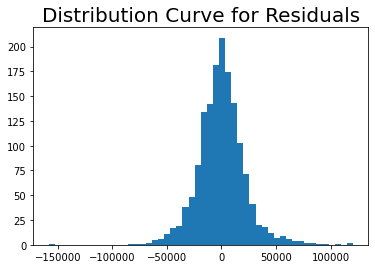

In [270]:
plt.hist(resids, bins=50)
plt.title('Distribution Curve for Residuals', fontsize=20);
#Normality of the residuals is an assumption of running a linear model. 
#if residuals are normal, it means that assumption is valid and model inference is also be valid

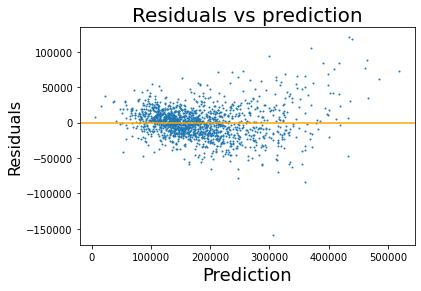

In [271]:
plt.scatter(y_preds, resids, s = 1)
plt.axhline(0, color = 'orange')
plt.title('Residuals vs prediction', fontsize=20)
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Residuals', fontsize=16);
#what we want is not to deviate a lot from 0 line

## Ridge Model

In [272]:
# Instantiate.
R = Ridge()
ridge_model = Ridge(alpha = 10)
#the larger is the alpha, the higher is the smoothness constraint
#alpha term, the penalty or the tuning parameter

# Fit.
ridge_model.fit (Z_train, y_train)

Ridge(alpha=10)

In [273]:
# Evaluate model using R2. train and val
print (ridge_model.score(Z_train, y_train))
print (ridge_model.score(Z_val, y_val))

0.919551074080068
0.8943819449485513


In [274]:
cross_val_score(ridge_model, Z_train, y_train, scoring= 'neg_root_mean_squared_error', cv = 5).mean()

-24541.0887120544

In [275]:
#Make predictions
y_preds_ridge = ridge_model.predict(Z_train)
y_preds_ridge.mean()

181123.7068511199

In [276]:
statistics.mode(y_preds_ridge)

138765.34673865212

In [277]:
statistics.median(y_preds_ridge)

165398.07852612497

In [278]:
#Evaluation
#MSE; Mean squared error
metrics.mean_squared_error (y_train, y_preds_ridge)

488242633.4673178

In [279]:
#Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_train, y_preds_ridge))

22096.213102414582

In [280]:
#val
y_preds_ridge_val = ridge_model.predict(Z_val)
#MSE
print(metrics.mean_squared_error (y_val, y_preds_ridge_val))
#Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_val, y_preds_ridge_val)))

722363613.9345583
26876.8229881167


### Brute-force

In [281]:
#R2 for test is higher than train score for ridge

# Set up a list of ridge alphas to check.
r_alphas = np.logspace(0,5,100)
#manually set up range of alphas to test which one is the best alpha value

# Cross-validate over our list of ridge alphas.
#instantiate
ridge_cv= RidgeCV(alphas=r_alphas, scoring ='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv.fit (Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [282]:
#optimum value of alpha
ridge_cv.alpha_

93.26033468832199

In [283]:
#coefficient of alpha
ridge_cv.coef_

array([10341.04240776,  3074.14124652, 10237.74147167,  4175.76691858,
        4382.96464285, 11517.63783898,  3649.39844515, -8604.9183923 ,
       11109.62099153,  4338.50539046, 12716.1294712 ,  1164.40886718,
        2729.2385827 ,   535.26676012,  1447.3177996 ,  4691.18332767,
        6794.45945007,   571.01454984,   708.31045757,   709.70876604,
        4958.60432681,   360.8961534 ,   302.69952395,  -458.81884481,
        -573.78389641,    33.89028025,   231.63560125,   -74.18685705,
         588.48261069,  -879.83732496,  2782.21197218, -2029.66301686,
        -845.15787609,   171.34858394,  4128.00973963, -1557.36546572,
         418.18584941, -1578.64399449,  -590.1571447 , -2395.52953754,
        1521.59531168, -1862.50209498,  3155.87175036,  6542.87615861,
       -2750.83840475, -1148.76082647,  -551.18885333, -1290.22738686,
        2357.94085962,  7192.85650205,  -611.13961679,   868.56212314,
        -335.43886953,  1599.69712959,   433.33804903,    16.88278477,
      

In [284]:
# Evaluate model using R2. train and val
print (ridge_cv.score(Z_train, y_train))
print (ridge_cv.score(Z_val, y_val))

0.9184066209346333
0.8939823050479966


In [285]:
cross_val_score(ridge_model, Z_train, y_train, scoring= 'neg_root_mean_squared_error', cv = 5).mean()

-24541.0887120544

In [286]:
#Make predictions
y_preds_ridge2 = ridge_cv.predict(Z_train)
y_preds_ridge2.mean()

181123.70685111993

In [287]:
statistics.mode(y_preds_ridge2)

142319.87097363127

In [288]:
statistics.median(y_preds_ridge2)

166031.60277046758

In [289]:
#Evaluation
#MSE; Mean squared error
resids_ridge = y_train - y_preds_ridge
metrics.mean_squared_error (y_train, y_preds_ridge2)

495188292.6071687

In [290]:
np.sqrt(metrics.mean_squared_error(y_train, y_preds_ridge2))

22252.826620615382

In [291]:
#val
y_preds_ridge2_val = ridge_cv.predict(Z_val)
#MSE
print(metrics.mean_squared_error (y_val, y_preds_ridge2_val))
#Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_val, y_preds_ridge2_val)))

725096909.1339113
26927.62353298024


## LASSO Model

In [292]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(0, 250)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

In [293]:
#optimal value of alpha
lasso_cv.alpha_

1.0

In [294]:
# Evaluate model using R2. train and val
print (lasso_cv.score(Z_train, y_train))
print (lasso_cv.score(Z_val, y_val))

0.9195802221347935
0.8943106842184143


In [295]:
cross_val_score(lasso_cv, Z_train, y_train, scoring= 'neg_root_mean_squared_error', cv = 5).mean()

-24617.301359072037

In [296]:
#Make predictions
y_preds_lasso = lasso_cv.predict(Z_train)
y_preds_lasso.mean()

181123.7068511199

In [297]:
statistics.mode(y_preds_lasso)

138213.97052985997

In [298]:
statistics.median(y_preds_lasso)

165213.52997692366

In [299]:
#Evaluation
#MSE; Mean squared error
metrics.mean_squared_error (y_train, y_preds_lasso)

488065734.6108456

In [300]:
np.sqrt(metrics.mean_squared_error(y_train, y_preds_lasso))

22092.20981728278

In [301]:
#val
y_preds_lasso_val = lasso_cv.predict(Z_val)
#MSE
print(metrics.mean_squared_error (y_val,y_preds_lasso_val))
#Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_val, y_preds_lasso_val)))

722850994.2269553
26885.888384558828


C:\Anaconda3\envs\dsi30\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


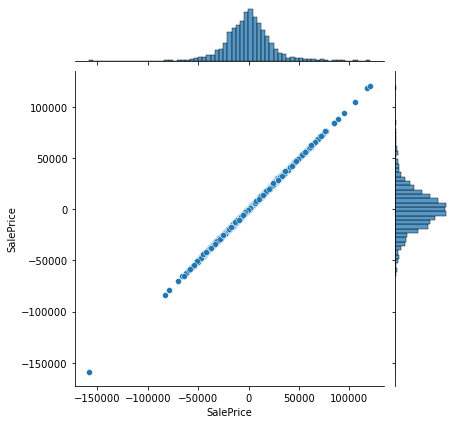

In [302]:
resids_ridge = y_train - y_preds_ridge
resids_lasso = y_train - y_preds_lasso

sns.jointplot(resids_ridge, resids_lasso);

--- 
# Part 5

Applying Lasso model to test.csv  
Summary, Conclusion and Recommendations

---

## Applying Lasso model to test.csv

In [303]:
y_preds_test = lasso_cv.predict(Z_test)

In [304]:
test2 = pd.read_csv('../datasets/test.csv')
df = pd.DataFrame((test2['Id']), columns=['Id'])

In [305]:
df['SalePrice']= y_preds_test

In [306]:
df.head()

,Id,SalePrice
0,2658,129689.638653
1,2718,179455.617946
2,2414,209746.939501
3,1989,105123.419288
4,625,172827.072715


In [307]:
df.to_csv('../datasets/predicted.csv',index=False)

## Summary, Conclusion and Recommendations

<span style="background-color: #FFFF00">Features Summary:</span>  

Dropped Features  

|Feature|Skewed distribution|No/little distinct pattern against SalesPrice|Too many null|Others|
|---|---|---|---|---|
|'MS Zoning'|1|0|0|Some Category have little values, Majority saleprice at similar|
|'Lot Shape'|0|1|0||
|'Land Contour'|1|0|0||
|'Utilities'|1|1|0||
|'Lot Config'|1|1|0||
|'Land Slope'|1|1|0||
|'Condition 1'|1|1|0|| 
|'Condition 2'|1|1|0|Too little data for many catagories| 
|'Bldg Type'|1|1|0||
|'House Style'|0|1|0|Little data for many catagories and mean sale price are close|
|'Year Remod/Add'|0|0|0|Age of property used, avoid overfitting| 
|'Roof Style'|1|1|0|Category mostly have similar mean sale price| 
|'Roof Matl'|1|1|0|Majority in 1 catagory|
|'Exterior 1st'|0|1|0||
|'Mas Vnr Type'|0|1|0|Mean sale price is similar, would need more data for other category apart from none|
|'Central Air'|1|0|0|Too little data for people with no central air|
|'Electrical'|1|0|0|Majority is in one catagory|
|'Half Bath'|0|1|0|Similar sale price mean|
|'Garage Yr Blt'|0|0|0|Age of property used, avoid overfitting|
|'Enclosed Porch'|1|0|0|Majority does not have|
|'Fence'|1|1|0|Mean sale price is similar| 
|'Misc Feature'|1|1|0|Majority does not have| 
|'Misc Val'|1|1|0|| 
|'Mo Sold'|0|1|0|Similar ranges and mean| 
|'Sale Type'|0|1|0|Majority is in one category, too little data values for the rest| 
|'Pool'|1|0|0|| 
|'Pool QC'|0|0|1|| 

Used Features  

|Feature|Quite evenly distributed|Distinct pattern changes|Correlation to SalePrice|
|---|---|---|---|
|'Street'|0|1|Nil|
|'Alley'|0|1|Nil|
|'Neighborhood'|1|1|Nil|
|'Paved Drive'|0|1|Nil|
|'MS SubClass'|1|1|Nil|
|'Garage Type'|1|1|Nil| 
|'Foundation'|1|1|Nil|
|'Exterior 2nd'|1||Nil|
|'1st Flr SF'|1|1|0.65|
|'2nd Flr SF'|0|1|0.25|
|'Gr Liv Area'|1|1|0.72|
|'Functional'|0|1|0.13|
|'Wood Deck SF'|1|1|0.33|
|'Lot Frontage'|1|1|0.18|
|'Lot Area'|1|1|0.3|
|'Bsmt Full Bath'|1|1|0.29|
|'Bsmt Half Bath'|0|1|-0.04|
|'Full Bath'|1|1|0.54|
|'TotRms AbvGrd'|1|1|0.511|
|'Mas Vnr Area'|1|1|0.52|
|'Low Qual Fin SF'|0|1|-0.04|

Newly formed features  
All old features here are either numerical or numerized  

|Feature|Original dropped features used, Formula|Correlation to SalePrice|
|---|---|---|
|'Overall Qual Cond'|'Overall Qual' * 'Overall Cond'|0.57|
|'Exter Qual Cond'|'Exter Qual' * 'Exter Cond'|0.60|
|'Bsmt Qual Cond Exposure'|'Bsmt Qual' * 'Bsmt Cond' * 'Bsmt Exposure'||
|'Bsmt'|'BsmtFin Type 1' * 'BsmtFin SF 1' + 'BsmtFin Type 2' * 'BsmtFin SF 2' + 'Bsmt Unf SF'+ 'Total Bsmt SF' 'Bsmt Qual Cond Exposure'|0.69|
|'Kitchen and Qual'|'Kitchen Qual' * 'Kitchen AbvGr'|0.46|
|'Fireplaces and Qual'|'Fireplace Qu' * 'Fireplaces'|0.52|
|'Garage'|'Garage Cond' * 'Garage Qual' * 'Garage Area' * 'Garage Finish' * 'Garage Cars'|0.76|
|'Porch total'|'Open Porch SF' + '3Ssn Porch' + 'Screen Porch'|0.33|
|'Age'|'Yr Sold' - 'Year Built'|-0.57|
|'HeatingMod'|'Heating' * 'Heating QC'|0.46|  

Heating catagories was numerized by taking the category mean over sum of all category means.

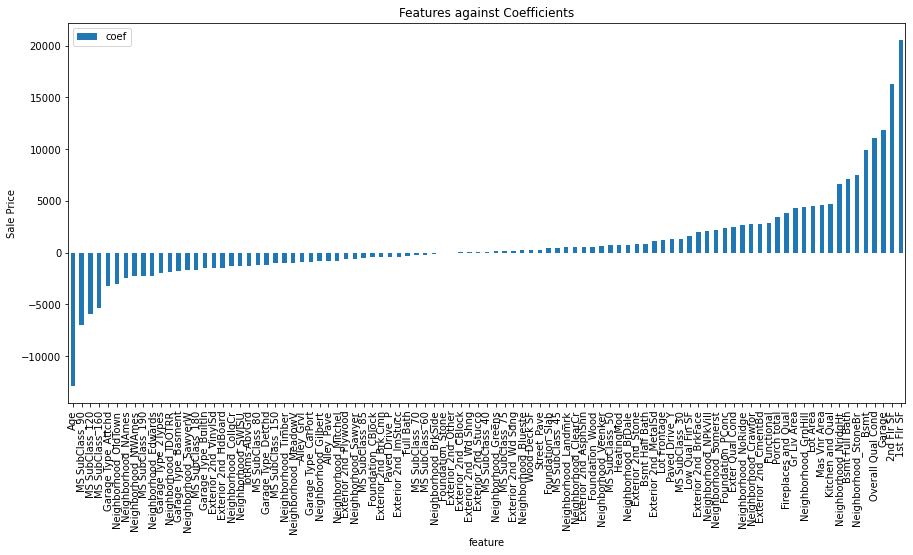

In [308]:
df2 = pd.DataFrame ({'feature': X_train.columns, 
                        'coef':lasso_cv.coef_})
df2.sort_values(by='coef',ascending = True). plot(kind='bar', x='feature', figsize=(15,7))
plt.title("Features against Coefficients")
plt.ylabel('Sale Price');

In [309]:
sorted(set(zip(X_train.columns, lr.coef_)))

[('1st Flr SF', 25.540530358744263),
 ('2nd Flr SF', 9.439372922579878),
 ('Age', -422.4890521677918),
 ('Alley_Grvl', -3683.6828280300556),
 ('Alley_Pave', -4925.520500963604),
 ('Bsmt', 0.27104405554883915),
 ('Bsmt Full Bath', 13643.888257228524),
 ('Bsmt Half Bath', 3433.195138239694),
 ('Exter Qual Cond', 1112.1542634558548),
 ('Exterior 2nd_AsphShn', 15385.603342428136),
 ('Exterior 2nd_Brk Cmn', -4351.049156342623),
 ('Exterior 2nd_BrkFace', 15134.78312800098),
 ('Exterior 2nd_CBlock', 1379.7272574815283),
 ('Exterior 2nd_CmentBd', 14253.442755636224),
 ('Exterior 2nd_HdBoard', -4210.940107311303),
 ('Exterior 2nd_ImStucc', -4653.050127145522),
 ('Exterior 2nd_MetalSd', 3083.3237482531154),
 ('Exterior 2nd_Other', 0.0),
 ('Exterior 2nd_Plywood', -2276.4583125619524),
 ('Exterior 2nd_Stone', 15850.10358262508),
 ('Exterior 2nd_Stucco', 590.2286555868561),
 ('Exterior 2nd_VinylSd', -3082.6562349287883),
 ('Exterior 2nd_Wd Sdng', 616.4568772217283),
 ('Exterior 2nd_Wd Shng', 257.47

|Model|R2 train/val|CrossValScoreTrain|SqMSE train/val|Alpha|
|---|---|---|---|---|
|**Linear**|0.91/0.89|26426|22092/26887||
|**Ridge**|0.91/0.89|26346|22252/26927|93.2|
|**Lasso**|0.91/0.89|24617|22092/26885|1|

<span style="background-color: #FFFF00">Definitions:  </span> 
1. Coefficients; the values that multiply the predictor values.  
2. Coefficient of Determination, R2; determines the proportion of variance in the dependent variable that can be explained by the independent variable  
3. Root Mean squared error; standard deviation of the residuals (prediction errors)  
4. Alpha; is the learning rate parameter which has to be set in a gradient descent to get the desired outcome from a machine learning model. Alpha is a set amount of change in the coefficients on each update

<span style="background-color: #FFFF00">Summary:  </span>   
From data from train.csv file, we cleaned the data by removing the rows or replacing all the nan values with zeros. We numurized some feature values by replacing the values based on the ranking of values and combined with similar features to give a new feature value that would have higher relavanceand would hence give a better representation as feature to predict the Sales Price.    



|Model|Mean|Mode|Median|
|---|---|---|---|
|**Baseline**|181469|130000|162500|
|**Linear**|181123|138163|165215|
|**Ridge**|181123|142319|166031|
|**Lasso**|138213|138213|165213|

<span style="background-color: #FFFF00">Models:</span>   
There are three regression models constructe; Linear, Ridge and Lasso. Linear regression model as the name suggests, is a linear model. It is a model that assumes a linear relationship between the input feature (X) and the single output variable (y), allowing y to be calculated from a linear combination of the input variables (x). Ridge regression model and Lasso regression puts a similar constraint on the coefficients by introducing a penalty factor. However, while lasso regression takes the magnitude of the coefficients, ridge regression takes the square.

Out of the three models constructed, we pick the Lasso model for prediction of the Sales Price in the test data set in the test.csv file.
Based on the table above, we can see that while the coefficient of determination; R2 are identical, the root mean squared error differs. Lasso model have scored the lowest in the root Mean squared error cross-validation tests. This test splits the data used to train the model;training data, into multiple folds, and evaluates the model based on the partition of the data. The score across all partitions are being averaged to give the value in the table. As root mean squared error is the standard deviation of the residuals; prediction errors, we would want this value to be as low as possible. _Lasso_ model have got the lowest score in both cross validation and train/test split.  

Baseline is formed using the mean, mode and median of train set, sale price. all models have lower mean than the baseline, which means the models are performing better than the baseline. Lasso model have done considerability better compared to the linear and ridge model.

<span style="background-color: #FFFF00">Coefficient interpretation:</span> 

The coefficient for a feature represents the change in the mean response associated with a change in that term, while the other features in the model are held constant.([*source*](https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/regression/how-to/fit-regression-model/interpret-the-results/all-statistics-and-graphs/coefficients-table/)).The coefficient tells us how much the dependent variable which is 'Sale Price' in our case, is expected to increase when that independent variable/feature, holding all the other independent variables/features constant. ([*source*](https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm)).

Based on the model, you can see that the biggest positive change in predicted sale price is when 1st floor square feet, 2nd floor square feet is high. Followed by overall quality and condition, garage and basement feature attributes would affect the Sale Price positively.  

Features that would greatly impact the Sales Price negatively would be the age of property, type of garage, MS subclass 90 (DUPLEX - ALL STYLES AND AGES),120 (1-STORY PUD (Planned Unit Development) - 1946 & NEWER) and 160 (2-STORY PUD - 1946 & NEWER).

<span style="background-color: #FFFF00">Limitations of the lasso model:</span>  
If the number of predictors is greater than the number of observations, Lasso will pick at most predictors as non-zero, even if all predictors are relevant (or may be used in the test set).  
If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data.  
As the data is limited and there is insufficient data for some feature's variables, we cannot properly determine the feature correlation to the Sale Price and hence resulting in it not used in this model. Without these features added, the model would not be able to accurately determine the Sales Price of the property should there be any correlation between the feature's variable to the Sales Price.
We would need more data in such feature in order to include and enhance future models.

<span style="background-color: #FFFF00">Conclusion:</span> 

With this model, we can accurately predict and determine the property value for a fairer accessment of the property value for taxation. More data could be collected to refine the features used in the model to improve the model in the future. 